## Problem Statement of the Project

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, we will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

## Business Problem Overview

According to the reputed research firm, Nelson Report, the total card payment volume is expected to hit a hopping \$79.14 trillion by 2030. However,the industry will lose an estimated **$49.32 billion to fraud**. What a loss, guru ji!

So it is a proactive practice to put in a monitoring and fraud prevention mechanism in place in the banking industry.

The Machine Learning models helps these banking instituitions from back-breaking manual reviews, legitimate service intrupptions,associated costs, and plethora of reasons.

Overall, it's a loss of credibility, trust and hence, financial loss to the institutions.

## Defining Fraud

Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, following are the other ways:

- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stealing/loss of credit cards
- Fraudulent telemarketing

## The Steps Followed in this Project

The following are the steps we follow in doing this project:
1. Data Pipeline
2. Exploratory Data Analysis (EDA)
3. Train/Test Split
4. Model Building and Hyperparameter tuning
5. Model Evaluation
6. Conclution

Let's gooo!

In [ ]:
#Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#For metrics

from sklearn import metrics
from sklearn import preprocessing

#Import warning to supress them with highhand

import warnings
warnings.filterwarnings("ignore")

#We will import rest of the libraries as and when required

In [ ]:
#Let's read the data we have at hand
data = pd.read_csv("drive/MyDrive/Capstone/creditcard.csv")

In [ ]:
#Let's see the head of the data we uploaded
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


There are 31 columns available in the data!

In [ ]:
#Let's check the shape of the data
data.shape

(284807, 31)

Again we can say there are 280K plus rows and 31 columns in the credit card data we have.

In [ ]:
#Or there any null values in the data we have? Let's see
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values in the data we have

In [ ]:
#Or there any duplicates in the data? Let's check
data.duplicated(keep=False).sum()

1854

There are about 1854 duplicates in the data. So we have to address this duplicate data. Otherwise we feed noise to the machine learning model we build.

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(283726, 31)

In [ ]:
#Let's check whether there are duplicate values
data.duplicated(keep=False).sum()

0

So there are no duplicate values in the data! No let's proceed further.

In [ ]:
#Let's check the data types
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Comment on Time Column

Look at Time column type! It's in float type. There is no day, month or year. Since this data is collected over period of two days. So how can we use this colume if we would like to keep this column in the data? We can guess that odd transaction timing is one of the signs of fraudlence. But can we really bank on the timing of the fraud? Let's see.

In [ ]:
#Let's check the skewness of dataset
data.skew()

Time      -0.035581
V1        -3.273271
V2        -4.695162
V3        -2.151984
V4         0.671504
V5        -2.414079
V6         1.829880
V7         2.890271
V8        -8.310970
V9         0.537663
V10        1.252967
V11        0.344074
V12       -2.199008
V13        0.064293
V14       -1.918804
V15       -0.309659
V16       -1.051161
V17       -3.690497
V18       -0.248661
V19        0.108312
V20       -2.043121
V21        2.820033
V22       -0.182330
V23       -5.867221
V24       -0.552129
V25       -0.415744
V26        0.580292
V27       -0.753804
V28       11.555115
Amount    16.978803
Class     24.430545
dtype: float64

Skewness indicates the presence of outliers in the data, which drastically influence our machine learning model. Statistically, the acceptable skewness is -3 to +3. During the EDA of this dataset, we are going to fix the skewness.

### Summary of Data Pipeline

In this pipeline, let's summarize the key findings:

1. No null values in the columns
2. There are duplicate values in the data. We removed them.
3. We found out that Time column is float type. We need to take a call on this this column whether to continue it or not!
4. There's skewness in the data which informs us the presence of outliers. We'll fix it during the EDA.

## Exploratory Data Analysis (EDA)

In the EDA step, we are going to do the following:

- Use Bar and Scattor plots to understand Time, Amount and Classes columns
- We'll make a decision to remove Time column

In [ ]:
#Let's focus more on the Classes column and get some insights

classes=data['Class'].value_counts()                   #Returns us the number of unique values
normal_share=classes[0]/data['Class'].count()*100      #Returns the share of normal transactions in percentage
fraud_share=classes[1]/data['Class'].count()*100       #Returns the share of fraud transactions in percentage

In [ ]:
print(classes)
print(normal_share)
print(fraud_share)

0    283253
1       473
Name: Class, dtype: int64
99.83328986416473
0.1667101358352777


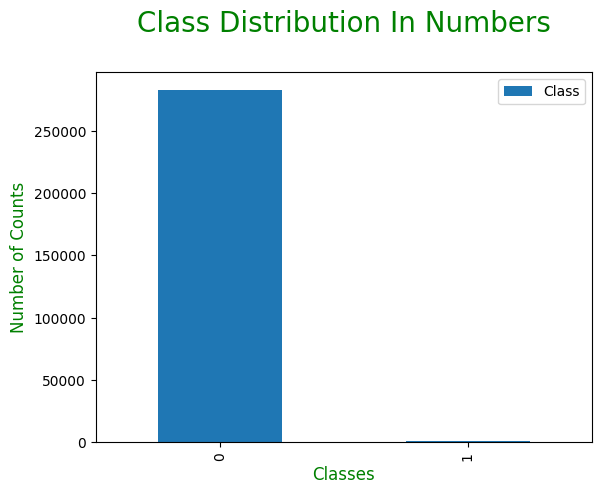

In [ ]:
#Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
data['Class'].value_counts().plot.bar()
plt.title("Class Distribution In Numbers\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Classes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Number of Counts", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})

plt.legend()
plt.show()

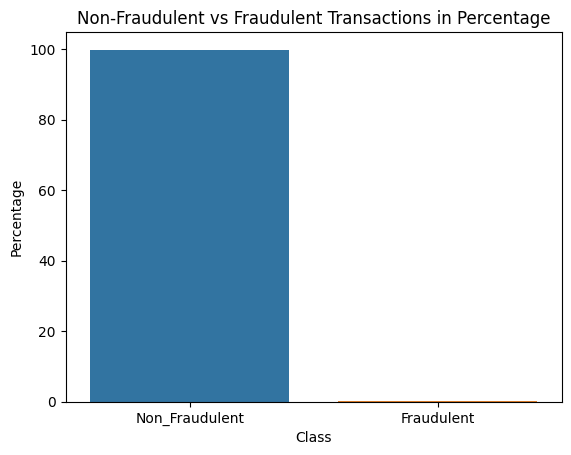

In [ ]:
#Create a scatter plot to observe the distribution of classes with time
#Create a dictionary of classes and percentage shares
fraud_percentage = { 'Class': ['Non_Fraudulent', 'Fraudulent'], 'Percentage': [normal_share, fraud_share]}

#Create a dataframe of classes and their respective percentage
df_fraud_percentage= pd.DataFrame(fraud_percentage)

#Plot barplot using seaborn
sns.barplot (x= 'Class', y='Percentage', data = df_fraud_percentage)

#Give the plot a title
plt.title("Non-Fraudulent vs Fraudulent Transactions in Percentage")
plt.show()

### Comment

Look at the two visualized images. What can we draw from this insights? Non-Fraudulent transactions dominate the dataset we have. In one word or two: the data is highly imbalanced. We will address this issue in the following steps.

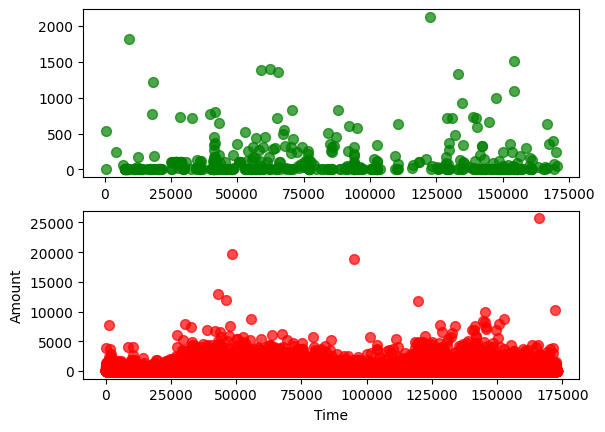

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
#In order to plot a scatter plot, we need to have datasets of classes. Let's create them.

fraud_trans = data[data['Class']==1]     #The digit '1' indicates fraud transaction
normal_trans = data[data['Class']==0]    #The digit '0' indicates normal transaction

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(fraud_trans.Time, fraud_trans.Amount, c='Green', alpha =0.7, s=50)
ax2.scatter(normal_trans.Time, normal_trans.Amount, c='Red', alpha =0.7, s=50)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

### Comment

Look at the normal transactions and fraud transactions over time. We don't see any abnormal behaviour here. So we can delete the Time column from the dataset we have.

In [ ]:
#Let's drop unnecessary Time column
data.drop('Time', axis=1, inplace=True) #We use inplace=True so that we can make changes to original dataframe itself

## Train-Test Split

Now, let's split the data into train and test samples.

In [ ]:
#Put the target variable out of X
X = data.drop(['Class'], axis=1)

In [ ]:
#Put that target variable into y
y= data['Class']

In [ ]:
#Import necessary lib
from sklearn.model_selection import train_test_split

In [ ]:
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
#Let's check the shape of the train and test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(226980, 29)
(56746, 29)
(226980,)
(56746,)


In [ ]:
#Preserve X_test & y_test to evaluate on the test data once you build
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

473
360
113


In [ ]:
#Scale the Amount column
from sklearn.preprocessing import StandardScaler

In [ ]:
#Instanciate the scaler
scaler = StandardScaler()

In [ ]:
#Fit and transform the scaler
X_train['Amount']=scaler.fit_transform(X_train[['Amount']])

In [ ]:
#Display first few rows or columns
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49578,-1.550810,0.731824,2.549028,2.733753,0.250049,2.870749,0.354236,0.007231,-0.037368,1.419594,...,-0.312468,0.005203,0.831394,0.117041,-0.935059,-0.665162,0.188614,-0.910417,-0.273559,0.008282
56032,-1.305339,1.059107,1.586936,1.650134,1.669107,-0.680811,0.717706,0.072364,-1.664982,-0.693306,...,0.117144,-0.101308,-0.557447,-0.121542,-0.058211,0.390341,-0.219061,0.017214,0.108434,-0.324396
272370,-1.498534,1.268183,-1.360645,-1.310035,2.744320,3.666680,0.234403,0.502133,0.313536,1.060169,...,-0.053535,-0.067233,-0.546292,0.212806,0.703104,-0.805702,0.195482,-1.110255,0.304176,-0.341687
13917,1.198304,0.378397,0.541355,0.835317,-0.386506,-0.829408,-0.137542,-0.121206,1.122380,-0.470237,...,-0.149218,-0.377945,-0.909802,0.158471,0.420259,0.117492,0.027304,-0.057095,0.015486,-0.340489
132654,-0.833194,0.769305,0.865990,-2.250385,1.018626,0.090372,0.751702,0.149752,-0.268840,-0.716749,...,-0.038624,-0.020569,-0.044707,-0.211529,-1.094250,-0.174526,0.678921,0.117100,0.158518,-0.351151


In [ ]:
#Apply transformation on the test set
X_test['Amount']=scaler.transform(X_test[['Amount']])

#Display first few rows
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
174240,1.933240,-1.316851,0.425610,-0.354184,-1.854467,-0.021007,-1.602457,0.219034,0.271361,0.937272,...,-0.484497,-0.069772,0.311095,0.293697,0.082676,-0.745557,0.597068,0.016508,-0.031391,-0.139189
277496,-1.592290,1.511862,-1.410847,-1.175748,2.867225,3.524474,0.495902,1.614884,-1.271709,-1.257424,...,-0.379965,0.100349,-0.083137,-0.474007,0.695183,1.356110,-0.486276,-0.350054,-0.118218,-0.183394
105198,-0.976564,0.585510,-0.003142,-0.945268,3.539277,2.916666,0.460135,0.831828,-1.095137,-0.601215,...,0.101061,-0.297875,-1.264529,-0.179137,0.936423,0.677656,-0.705164,0.000772,0.064120,-0.346758
227782,1.780293,-1.063671,0.680026,0.841410,-1.653529,0.392116,-1.514345,0.467485,2.093653,0.028845,...,-0.227392,0.203172,0.798490,0.178572,0.094661,-0.515228,0.371839,0.026977,-0.036803,-0.163268
116080,-1.153910,1.533617,0.434139,-0.495930,0.378126,-0.067809,0.530507,0.229062,0.300117,0.817031,...,0.497949,-0.456433,-0.912641,-0.160596,-0.944142,0.048795,0.090333,0.100562,-0.249673,-0.314852


### Check for Skewness

Here we are going to check for skewness if there is and are going to address it in the dataset.

What is skewness in a layman terms? Simple. The data shoudl give us a bell-shape figure when we plot it. If it is not symmetrical, then we call it positive or negative skewness depending on the side where the shape lies majorly.

In [ ]:
#Check the columns in the data
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

Text(0.5, 1.0, 'V1        -3.228385\nV2        -4.310022\nV3        -2.157413\nV4         0.657380\nV5        -3.005383\nV6         1.994205\nV7         3.728215\nV8        -7.966852\nV9         0.535140\nV10        1.278775\nV11        0.320893\nV12       -2.065047\nV13        0.065828\nV14       -1.788388\nV15       -0.309293\nV16       -0.958264\nV17       -3.404509\nV18       -0.233786\nV19        0.109851\nV20       -2.658458\nV21        3.068019\nV22       -0.173274\nV23       -5.919501\nV24       -0.557431\nV25       -0.428565\nV26        0.582532\nV27       -0.688179\nV28        8.831906\nAmount    16.658654\ndtype: float64')

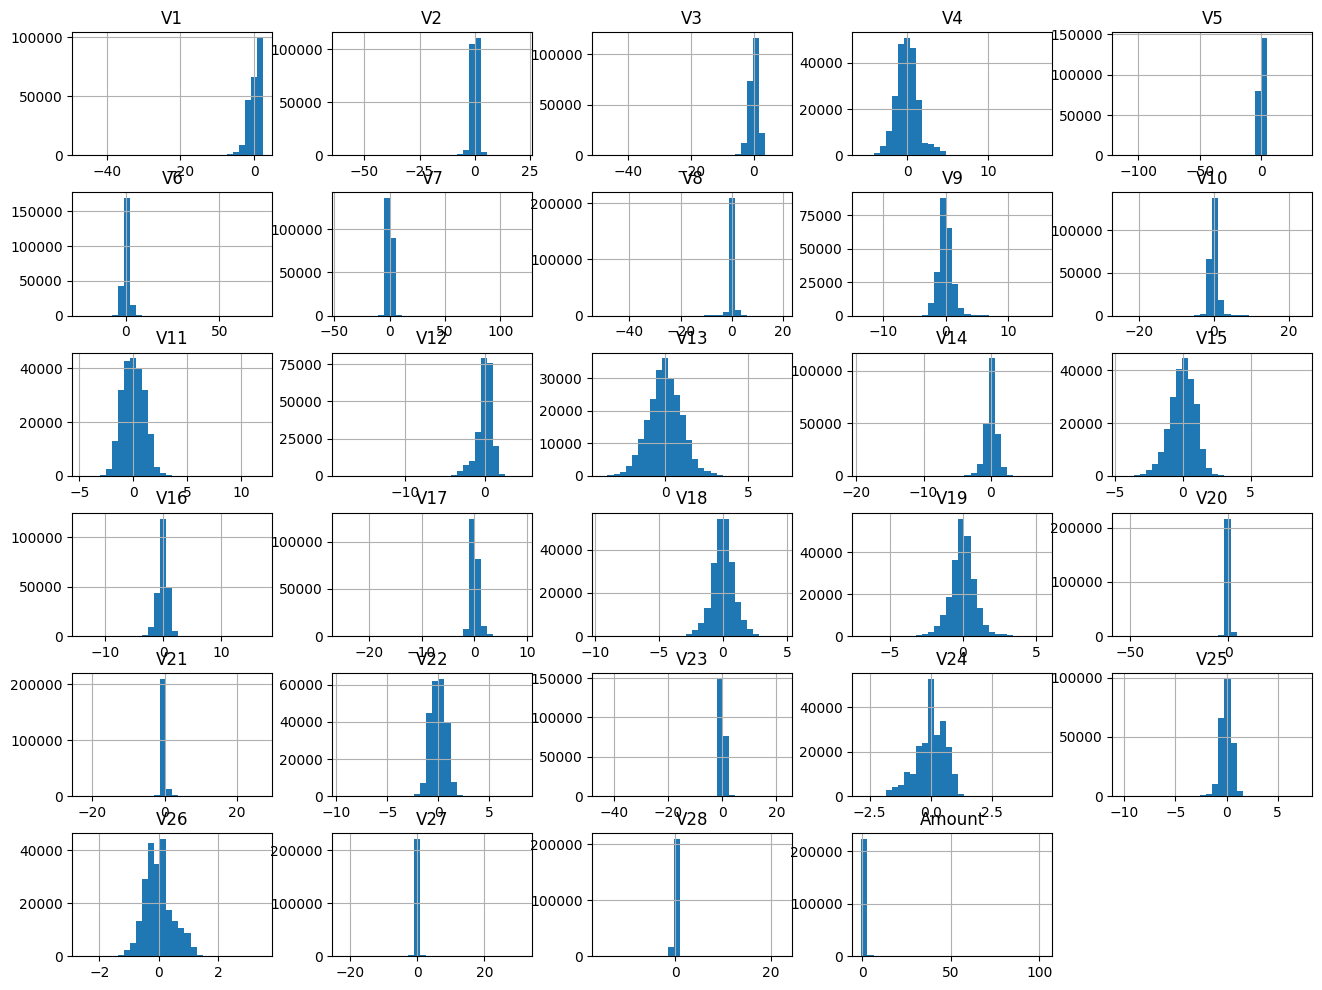

In [ ]:
#sns.distplot(X_train[cols])
#Let'see the skewness of variables
X_train.hist(bins=30, figsize=(16,12))
plt.title(str(X_train[cols].skew()))

The acceptable skewness rage is -3 to +3. The skewness of any variable out of this range suffers from the skewness. And it needs to be addressed.

We are going to use Power Transform package from preprocessing library in sklearn and make the variables which are skewed.

### Note about PowerTransformer

Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

By default, zero-mean, unit-variance normalization is applied to the transformed data.

In [ ]:
#Import the package
from sklearn.preprocessing import PowerTransformer

#Instantiate the power transformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

#Apply it our data
X_train[cols] = pt.fit_transform(X_train)
X_test[cols] = pt.transform(X_test)

Text(0.5, 1.0, 'V1       -0.217891\nV2        0.353387\nV3       -0.079098\nV4        0.017568\nV5       -1.309206\nV6       -1.886116\nV7        2.571997\nV8        2.250738\nV9       -0.049227\nV10      -1.307631\nV11       0.055853\nV12       0.138941\nV13       0.006737\nV14       0.084437\nV15       0.014928\nV16       0.156108\nV17      -0.861932\nV18      -0.056155\nV19       0.015024\nV20      -1.158579\nV21      -1.703979\nV22      -0.021712\nV23      -0.231261\nV24       0.109747\nV25       0.073893\nV26      -0.024144\nV27       3.550137\nV28       0.528847\nAmount    0.707613\ndtype: float64')

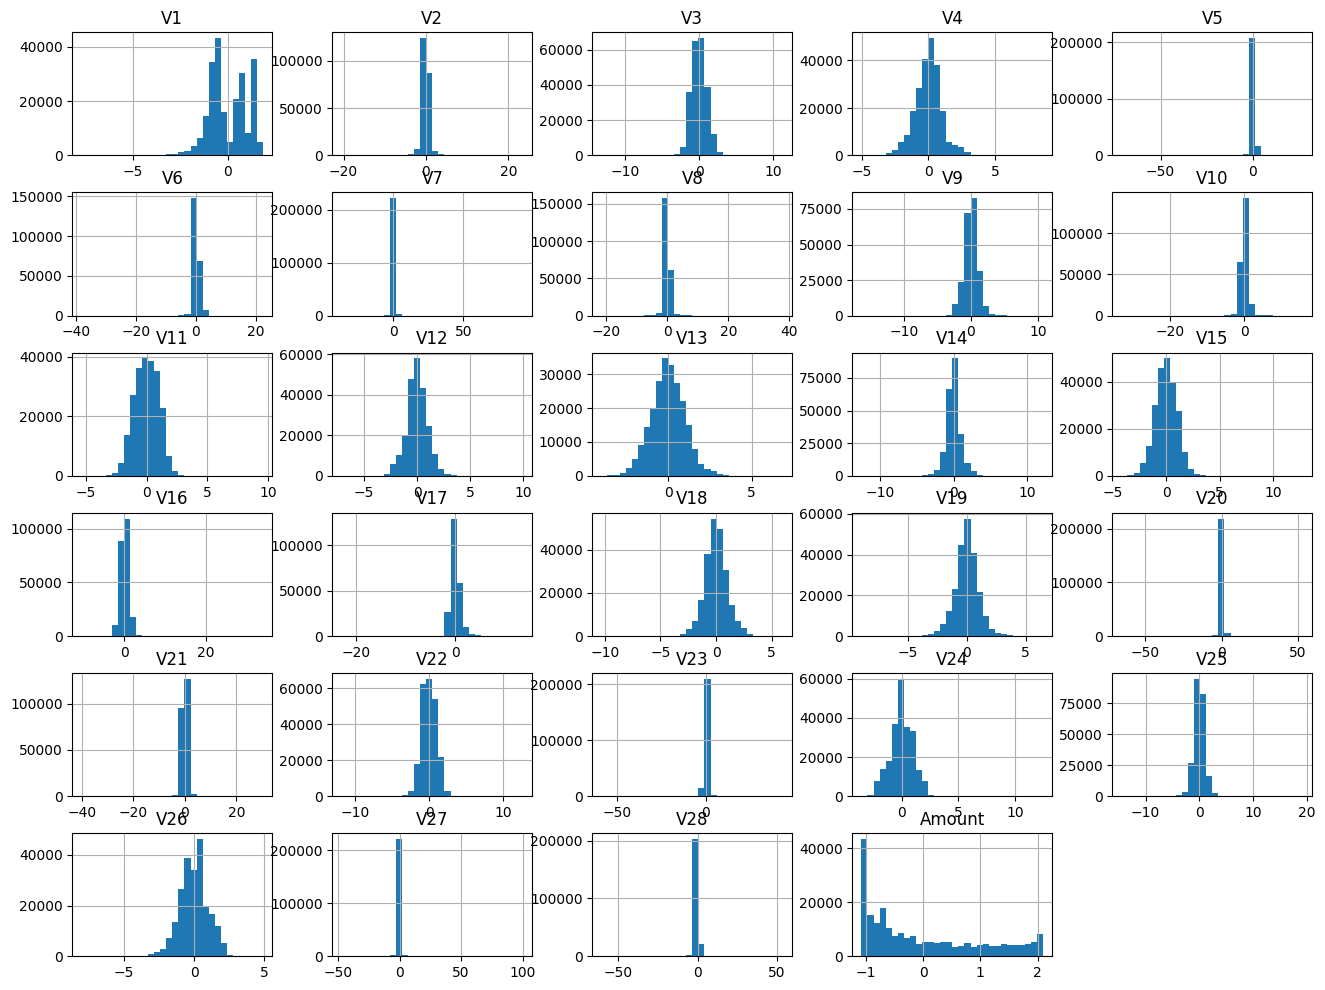

In [ ]:
#Plot the histogram again
X_train.hist(bins=30, figsize=(16,12))
plt.title(str(X_train[cols].skew()))

See the images! After the power transformation, the variables are Gaussian-like when we plot on the histogram.

## Model Building with Imbalanced Data

### Metric selection for imbalanced data
As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.





## Model 1: Logistic Regression

In [ ]:
#Import the model
from sklearn.linear_model import LogisticRegression

In [ ]:
#Also get metrics for calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix         #We need for getting TP, TN, FP, and FN
from sklearn.metrics import f1_score                 #We need measure this score using TP and other values
from sklearn.metrics import classification_report   #?

In [ ]:
#Import packages for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#Create folds for the data
folds = KFold(n_splits=5, shuffle=True, random_state=4)

#Specify the params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}    #C is the hypertuning parameter. The higher its values, the lower the regularization.

#GridSearchCV
model_cv=GridSearchCV(estimator=LogisticRegression(),
                      param_grid=params,
                      scoring='roc_auc',
                      verbose=1,
                      cv=folds,
                      return_train_score=True)

#Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#Results of the model
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.520770,0.035892,0.024141,0.003284,0.01,{'C': 0.01},0.994790,0.970376,0.975836,0.990847,...,0.977906,0.013583,1,0.979432,0.983707,0.983855,0.979258,0.988536,0.982958,0.003423
1,0.860563,0.185673,0.027199,0.007723,0.1,{'C': 0.1},0.993777,0.972341,0.976100,0.990583,...,0.976666,0.015419,2,0.978617,0.982979,0.982887,0.977479,0.987298,0.981852,0.003510
2,0.893626,0.087379,0.020920,0.000598,1,{'C': 1},0.993205,0.972375,0.975575,0.990257,...,0.976160,0.015625,3,0.978009,0.982665,0.982436,0.976745,0.986686,0.981308,0.003570
3,0.844725,0.045229,0.021103,0.001062,10,{'C': 10},0.993124,0.972348,0.975512,0.990213,...,0.976090,0.015647,4,0.977928,0.982626,0.982376,0.976652,0.986604,0.981237,0.003578
4,1.022832,0.199039,0.025056,0.007571,100,{'C': 100},0.993117,0.972342,0.975502,0.990211,...,0.976083,0.015649,5,0.977922,0.982622,0.982370,0.976644,0.986596,0.981231,0.003578
5,0.788782,0.059508,0.021001,0.001156,1000,{'C': 1000},0.993115,0.972342,0.975503,0.990210,...,0.976083,0.015649,6,0.977920,0.982622,0.982369,0.976643,0.986595,0.981230,0.003578


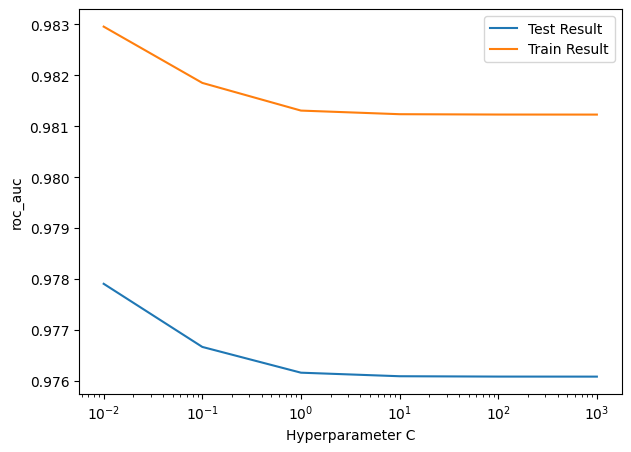

In [ ]:
#Let see the results on the plot
plt.figure(figsize=(7,5))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('Hyperparameter C')
plt.ylabel('roc_auc')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.xscale('log')
plt.show()

In [ ]:
#Best C valuese
best_score=model_cv.best_score_
best_C=model_cv.best_params_['C']

In [ ]:
print("The highest test roc_auc is {0} at C={1}".format(best_score, best_C))

The highest test roc_auc is 0.9779060493412117 at C=0.01


### Logistic Regression with Best C

In [ ]:
#Instantiate model with best C
logistic_imb=LogisticRegression(C=0.01)

#Fit the model
logistic_imb_best=logistic_imb.fit(X_train, y_train)

### Prediction on the Train set

In [ ]:
#Predict on the train set
y_train_pred=logistic_imb_best.predict(X_train)

#Confusion matrix
cm=metrics.confusion_matrix(y_train, y_train_pred)
print(cm)

[[226590     30]
 [   155    205]]


In [ ]:
TP=cm[1,1]  #True positives. That is fraud transactions.
TN=cm[0,0]  #True negatives. That is normal transactions.
FP=cm[0,1]  #False positives. These are incorrectly predicted as fraud transactions.
FN=cm[1,0]  #False negatives. These are incorrectly predicted as negatives. That is normal transactions.

In [ ]:
#Metrics
print('Accuracy:', metrics.accuracy_score(y_train, y_train_pred))
print('Recall:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('F1_score:',f1_score(y_train, y_train_pred))

Accuracy: 0.999184950215878
Recall: 0.5694444444444444
Specificity: 0.9998676198040773
F1_score: 0.6890756302521008


In [ ]:
#Classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       0.87      0.57      0.69       360

    accuracy                           1.00    226980
   macro avg       0.94      0.78      0.84    226980
weighted avg       1.00      1.00      1.00    226980



### The ROC on the Train set

In [ ]:
#Draw ROC
def draw_roc(actual, probs):
  fpr, tpr, thresholds =metrics.roc_curve(actual, probs, drop_intermediate=False)
  auc_score=metrics.roc_auc_score(actual, probs)
  plt.figure(figsize=(5,5))
  plt.plot(fpr, tpr, label='ROC curve(area=%0.2f)' % auc_score)
  plt.plot([0,1],[0,1],'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1-True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('The Reciever Operating Characteristic Example')
  plt.legend(loc='upper right')
  plt.show()

  return None

In [ ]:
#Predicted probabilities
y_train_pred_proba=logistic_imb_best.predict_proba(X_train)[:,1]

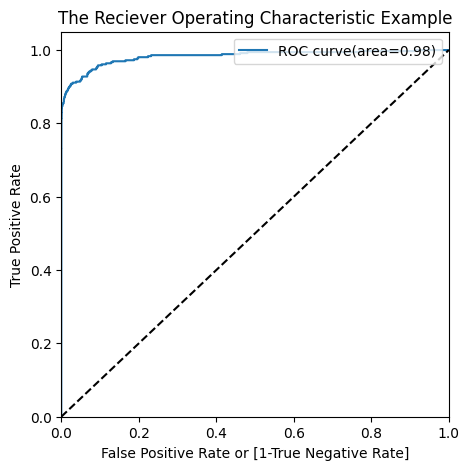

In [ ]:
#Get ROC
draw_roc(y_train, y_train_pred_proba)

### Note on ROC
The receiver operating characteristic is a metric used to check the quality of classifiers. For each class of a classifier, roc applies threshold values across the interval [0,1] to outputs. For each threshold, two values are calculated, the True Positive Ratio (TPR) and the False Positive Ratio (FPR). For a particular class i, TPR is the number of outputs whose actual and predicted class is class i, divided by the number of outputs whose predicted class is class i. FPR is the number of outputs whose actual class is not class i, but predicted class is class i, divided by the number of outputs whose predicted class is not class i.

From the figure, we come to know that we've got 0.98 which is pretty good score.

### Prediction on the Test set

In [ ]:
#Predict on the test set
y_test_pred=logistic_imb_best.predict(X_test)

In [ ]:
#Get the confusion matrix for the same
confusion=metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[56627,     6],
       [   47,    66]])

In [ ]:
#Meaning of confusion matrix elements
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [ ]:
#Get the metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("Recall:", TP/float(TP+FN))
print("Specificity:", TN/float(TN+FP))
print("F1 Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.999066013463504
Recall: 0.584070796460177
Specificity: 0.9998940547030883
F1 Score: 0.7135135135135136


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.92      0.58      0.71       113

    accuracy                           1.00     56746
   macro avg       0.96      0.79      0.86     56746
weighted avg       1.00      1.00      1.00     56746



### ROC on the Test set

In [ ]:
#Predict probabilities
y_test_pred_proba=logistic_imb_best.predict_proba(X_test)[:,1]

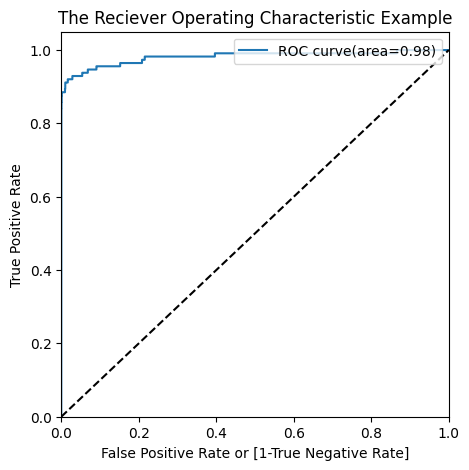

In [ ]:
#Draw ROC
draw_roc(y_test,y_test_pred_proba)

## Model 1: Summary
**Train Set**

- Accuracy: 0.999184950215878
- Sensitivity: 0.5694444444444444
- Specificity: 0.9998676198040773
- F1_score: 0.6890756302521008

**Test Set**

- Accuracy: 0.999066013463504
- Sensitivity: 0.584070796460177
- Specificity: 0.9998940547030883
- F1 Score: 0.7135135135135136

The model performs better on the test set slightly than the train set.



## Model 2: XGBoost

In [ ]:
#Import the package
from xgboost import XGBClassifier

In [ ]:
#Hyperparameter tuning with XGBoost
#Get the folds
folds=3

#Params
param_grid = {'learning_rate': [0.2, 0.6],
              'subsample': [0.3, 0.6, 0.9]}

#Model
xgb_model=XGBClassifier(max_depth=2, n_estimators=200)

#GridSearchCV
model_cv=GridSearchCV(estimator=xgb_model,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=folds,
                      verbose=1,
                      return_train_score=True)

#Fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#Get the results of cv
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,17.864952,0.730801,0.068645,0.001321,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.973490,0.977020,0.969926,0.973479,0.002896,4,0.999886,0.999776,0.999763,0.999808,5.494939e-05
1,26.109989,0.395630,0.068047,0.002418,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.976908,0.981822,0.968564,0.975765,0.005473,2,0.999962,0.999959,0.999951,0.999958,4.706654e-06
2,32.440422,1.016294,0.073719,0.007373,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.977213,0.975692,0.976713,0.976539,0.000633,1,0.999962,0.999944,0.999943,0.999950,8.588797e-06
3,17.726911,0.897086,0.068706,0.001691,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.968258,0.967218,0.962351,0.965942,0.002575,6,0.999996,0.999998,0.999997,0.999997,8.565849e-07
4,26.107878,0.271597,0.076539,0.005587,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.973561,0.973555,0.978424,0.975180,0.002294,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,31.222449,0.872553,0.070072,0.002169,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.969749,0.973874,0.971975,0.971866,0.001686,5,1.000000,1.000000,1.000000,1.000000,0.000000e+00


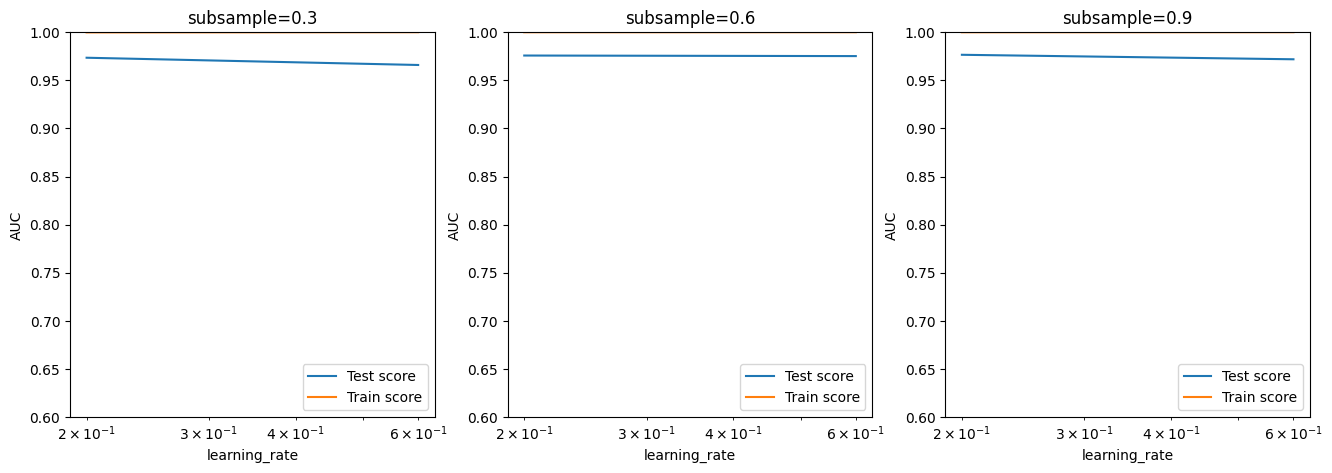

In [ ]:
#Plot the fig
plt.figure(figsize=(16,5))

param_grid={'learning_rate':[0.2, 0.6],
            'subsample': [0.3, 0.6, 0.9]}

for n, subsample in enumerate(param_grid['subsample']):

    plt.subplot(1, len(param_grid['subsample']), n+1)
    df=cv_results[cv_results['param_subsample']==subsample]
    plt.plot(df['param_learning_rate'], df['mean_test_score'])
    plt.plot(df['param_learning_rate'], df['mean_train_score'])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.6, 1])
    plt.legend(['Test score', 'Train score'], loc='lower right')
    plt.xscale('log')


In [ ]:
#Get the best params
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [ ]:
#Let's have models with best params
params={'learning_rate': 0.2,
        'n_estimators': 200,
        'subsample': 0.9,
        'max_depth':2,
        'obejective':'binary:logistic'}

#Fit the model
xgb_imb_model=XGBClassifier(params=params)

#Fit the model
xgb_imb_model.fit(X_train, y_train)

[05:53:58] WARNING: ../src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'obejective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

### Predict on the Train set

In [ ]:
#Prediction
y_train_pred=xgb_imb_model.predict(X_train)

In [ ]:
#Confusion matrix
confusion=metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[226620,      0],
       [     0,    360]])

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

#F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

Accuracy: 1.0
Recall: 1.0
Specificity: 1.0
F1-Score: 1.0


In [ ]:
# Classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       1.00      1.00      1.00       360

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



In [ ]:
# Predicted probability
y_train_pred_proba_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [ ]:
#AUC metric
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_xgb)
auc

1.0

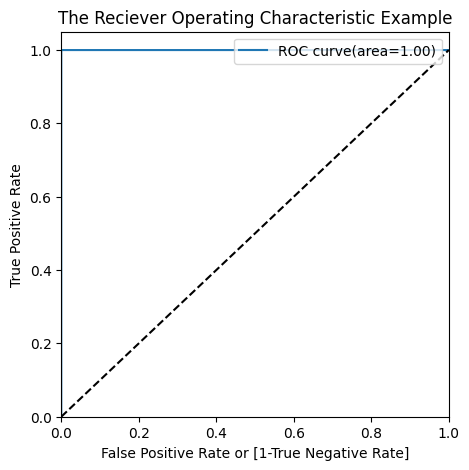

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_xgb)

### Prediction on the Test set

In [ ]:
#Prediction on the test set
y_test_pred=xgb_imb_model.predict(X_test)

In [ ]:
#Confusion matrix
confusion=metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[56629,     4],
       [   19,    94]])

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Recall:", TP/float(TP+FN))

# Specificity
print("Specificity:", TN/float(TN+FP))

# F1 score
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.9995946850879357
Recall: 0.831858407079646
Specificity: 0.9999293698020588
F1-Score: 0.8909952606635071


In [ ]:
#Get classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.96      0.83      0.89       113

    accuracy                           1.00     56746
   macro avg       0.98      0.92      0.95     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [ ]:
#Get roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9754986656049218

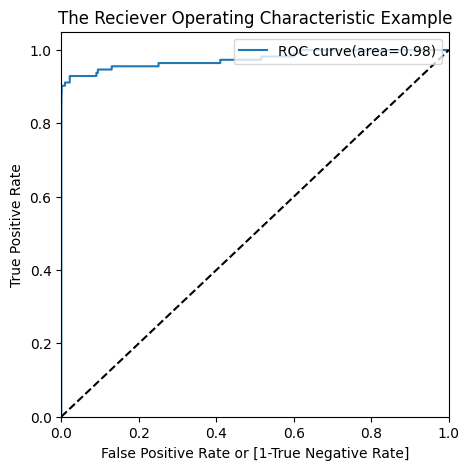

In [ ]:
#Plot it on the plot
draw_roc(y_test, y_test_pred_proba)

## Model 2: Summary

**Train Set**

- Accuracy: 1.0
- Sensitivity: 1.0
- Specificity: 1.0
- F1-Score: 1.0

**Test Set**

- Accuracy: 0.9995946850879357
- Sensitivity: 0.831858407079646
- Specificity: 0.9999293698020588
- F1-Score: 0.8909952606635071

XGBoost models performed well on the test set!

## Model 3: Decision Tree

In [ ]:
#Import the package
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Param grid
param_grid={
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50)}

#Instantiate the model
dtree=DecisionTreeClassifier()

model_cv=GridSearchCV(estimator=dtree,
                      param_grid=param_grid,
                      verbose=1,
                      cv=3,
                      scoring='roc_auc')

#Fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
#Print the results
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.516248,0.044566,0.019552,0.000184,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.899899,0.925929,0.936522,0.920783,0.015388,7
1,3.508368,0.006147,0.020044,0.000708,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.899905,0.925929,0.936507,0.920780,0.015380,8
2,3.508688,0.043202,0.021125,0.001186,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.918411,0.926045,0.936904,0.927120,0.007588,3
3,3.505258,0.047871,0.020156,0.000307,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.918411,0.926045,0.936887,0.927115,0.007581,4
4,6.897878,0.008398,0.023460,0.001338,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.913157,0.923681,0.933178,0.923339,0.008177,6
5,6.920593,0.111917,0.022200,0.000897,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.913161,0.931869,0.933168,0.926066,0.009141,5
6,6.872490,0.067427,0.021892,0.000770,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.902842,0.930576,0.956923,0.930114,0.022081,2
7,6.936992,0.057334,0.022604,0.000355,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.902842,0.930576,0.956975,0.930131,0.022102,1


In [ ]:
#Get the optimal values
print("The best ROC:", model_cv.best_score_)
print(model_cv.best_estimator_)

The best ROC: 0.9301308909187185
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [ ]:
#Build model using the best values
dt_imb_model=DecisionTreeClassifier(criterion='gini',
                                    max_depth=10,
                                    min_samples_leaf=100,
                                    min_samples_split=100,
                                    random_state=100)

#Fit the model
dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

### Predict on the Train set

In [ ]:
#Predict on the train set
y_train_pred=dt_imb_model.predict(X_train)

In [ ]:
#Confusion matrix
confusion=metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[226501,    119],
       [    65,    295]])

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:-", TN/float(TN+FP))

#F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

Accuracy: 0.9991893558903868
Recall: 0.8194444444444444
Specificity:- 0.9994748918895067
F1-Score: 0.7622739018087856


In [ ]:
#get classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       0.71      0.82      0.76       360

    accuracy                           1.00    226980
   macro avg       0.86      0.91      0.88    226980
weighted avg       1.00      1.00      1.00    226980



In [ ]:
#Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [ ]:
#The ROC curve
auc=metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9852781700153953

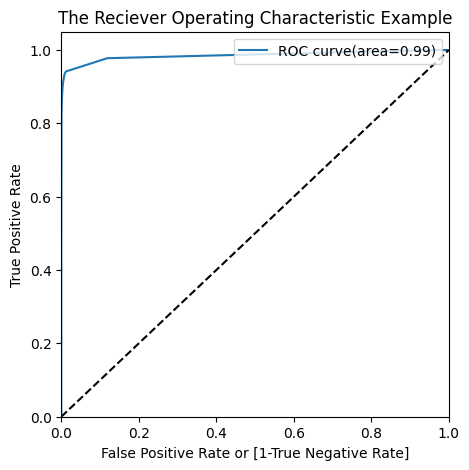

In [ ]:
#Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

### Predict on the Test set

In [ ]:
#Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [ ]:
#Confusion matrix
confusion=metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[56599,    34],
       [   18,    95]])

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

#F1 score
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.9990836358509851
Recall: 0.8407079646017699
Specificity: 0.9993996433175004
F1-Score: 0.7851239669421488


In [ ]:
#Get classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.74      0.84      0.79       113

    accuracy                           1.00     56746
   macro avg       0.87      0.92      0.89     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
#Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [ ]:
#Get the roc_auc score
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9390569212202959

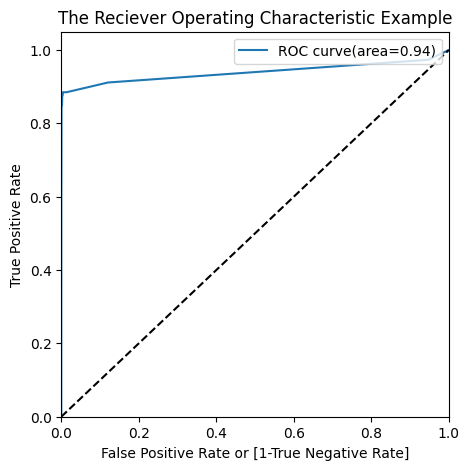

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Model 3: Summary

**Train Set**

1. Accuracy: 0.9991893558903868
2. Recall: 0.8194444444444444
3. Specificity:- 0.9994748918895067
4. F1-Score: 0.7622739018087856

**Test Set**

1. Accuracy: 0.9990836358509851
2. Recall: 0.8407079646017699
3. Specificity: 0.9993996433175004
4. F1-Score: 0.7851239669421488

Overall, Decision Tree model isn't that good when compared with XGBoost model

## Model 4: Random Forest

In [ ]:
#Get the package
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Hypertune the model
param_grid={
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300],
    'max_features': [10, 20]}

#Instantiate the model
rf=RandomForestClassifier()

#GridSearchCV
model_cv=GridSearchCV(
                      estimator=rf,
                      param_grid=param_grid,
                      n_jobs=-1,
                      verbose=1,
                      cv=2,
                      return_train_score=True)

#Fit the model
model_cv.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [ ]:
#Print the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv.best_score_,'using',model_cv.best_params_)

We can get accuracy of 0.9992334126354745 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [ ]:
#Model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50,
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [ ]:
#Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

Prediction on the Train set


In [ ]:
#Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[226620      0]
 [     0    360]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

#Recall
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

#F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy: 0.9993391488236849
Recall: 1.0
Specificity: 1.0
F1-Score:- 0.7720364741641338


In [ ]:
#Get classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       0.85      0.71      0.77       360

    accuracy                           1.00    226980
   macro avg       0.93      0.85      0.89    226980
weighted avg       1.00      1.00      1.00    226980



In [ ]:
#Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [ ]:
#Get roc_auc score
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9804555043195168

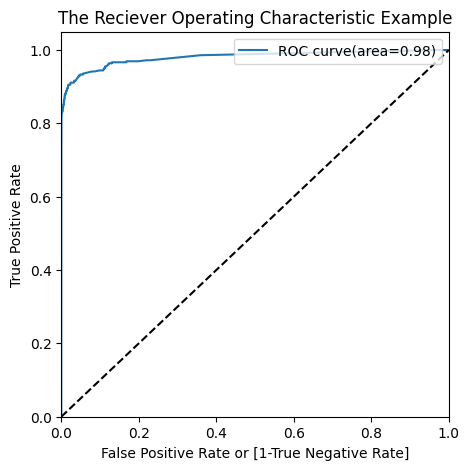

In [ ]:
#Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

Prediction on the Test set


In [ ]:
#Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56620    13]
 [   31    82]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

#Recall
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:",  TN/float(TN+FP))

#F1 score
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.9992246149508336
Recall: 0.7256637168141593
Specificity: 0.9997704518566913
F1-Score: 0.7884615384615384


In [ ]:
#Get classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.86      0.73      0.79       113

    accuracy                           1.00     56746
   macro avg       0.93      0.86      0.89     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
#Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [ ]:
#Get roc_auc score
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9774863118832651

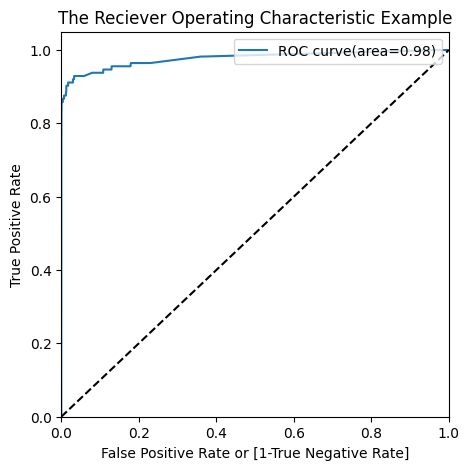

In [ ]:
#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Summary: Random Forest with Imbalanced Data

**Train Set**

1. Accuracy: 0.9993391488236849
2. Recall: 1.0
3. Specificity: 1.0
4. F1-Score:- 0.7720364741641338

**Test Set**

1. Accuracy: 0.9992246149508336
2. Recall: 0.7256637168141593
3. Specificity: 0.9997704518566913
4. F1-Score: 0.7884615384615384

## Best Model on The Imbalanced Data

We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well. More specifically XGBoost performed best in terms of ROC-AUC score.

But as we have to choose one of them, we can go for the best--XGBoost, which gives us ROC score of 1.0 on the train data and 0.98 on the test one.

Keep in mind that XGBoost requires more resource utilization than Logistic model. Hence building XGBoost model is more costlier than the Logistic model. But XGBoost scores well (1 on train and 0.98 on test), which is 0.02 more than the Logistic model.

### Print the important features of the best model to understand the dataset

This will not give much explanation on the already transformed dataset
But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


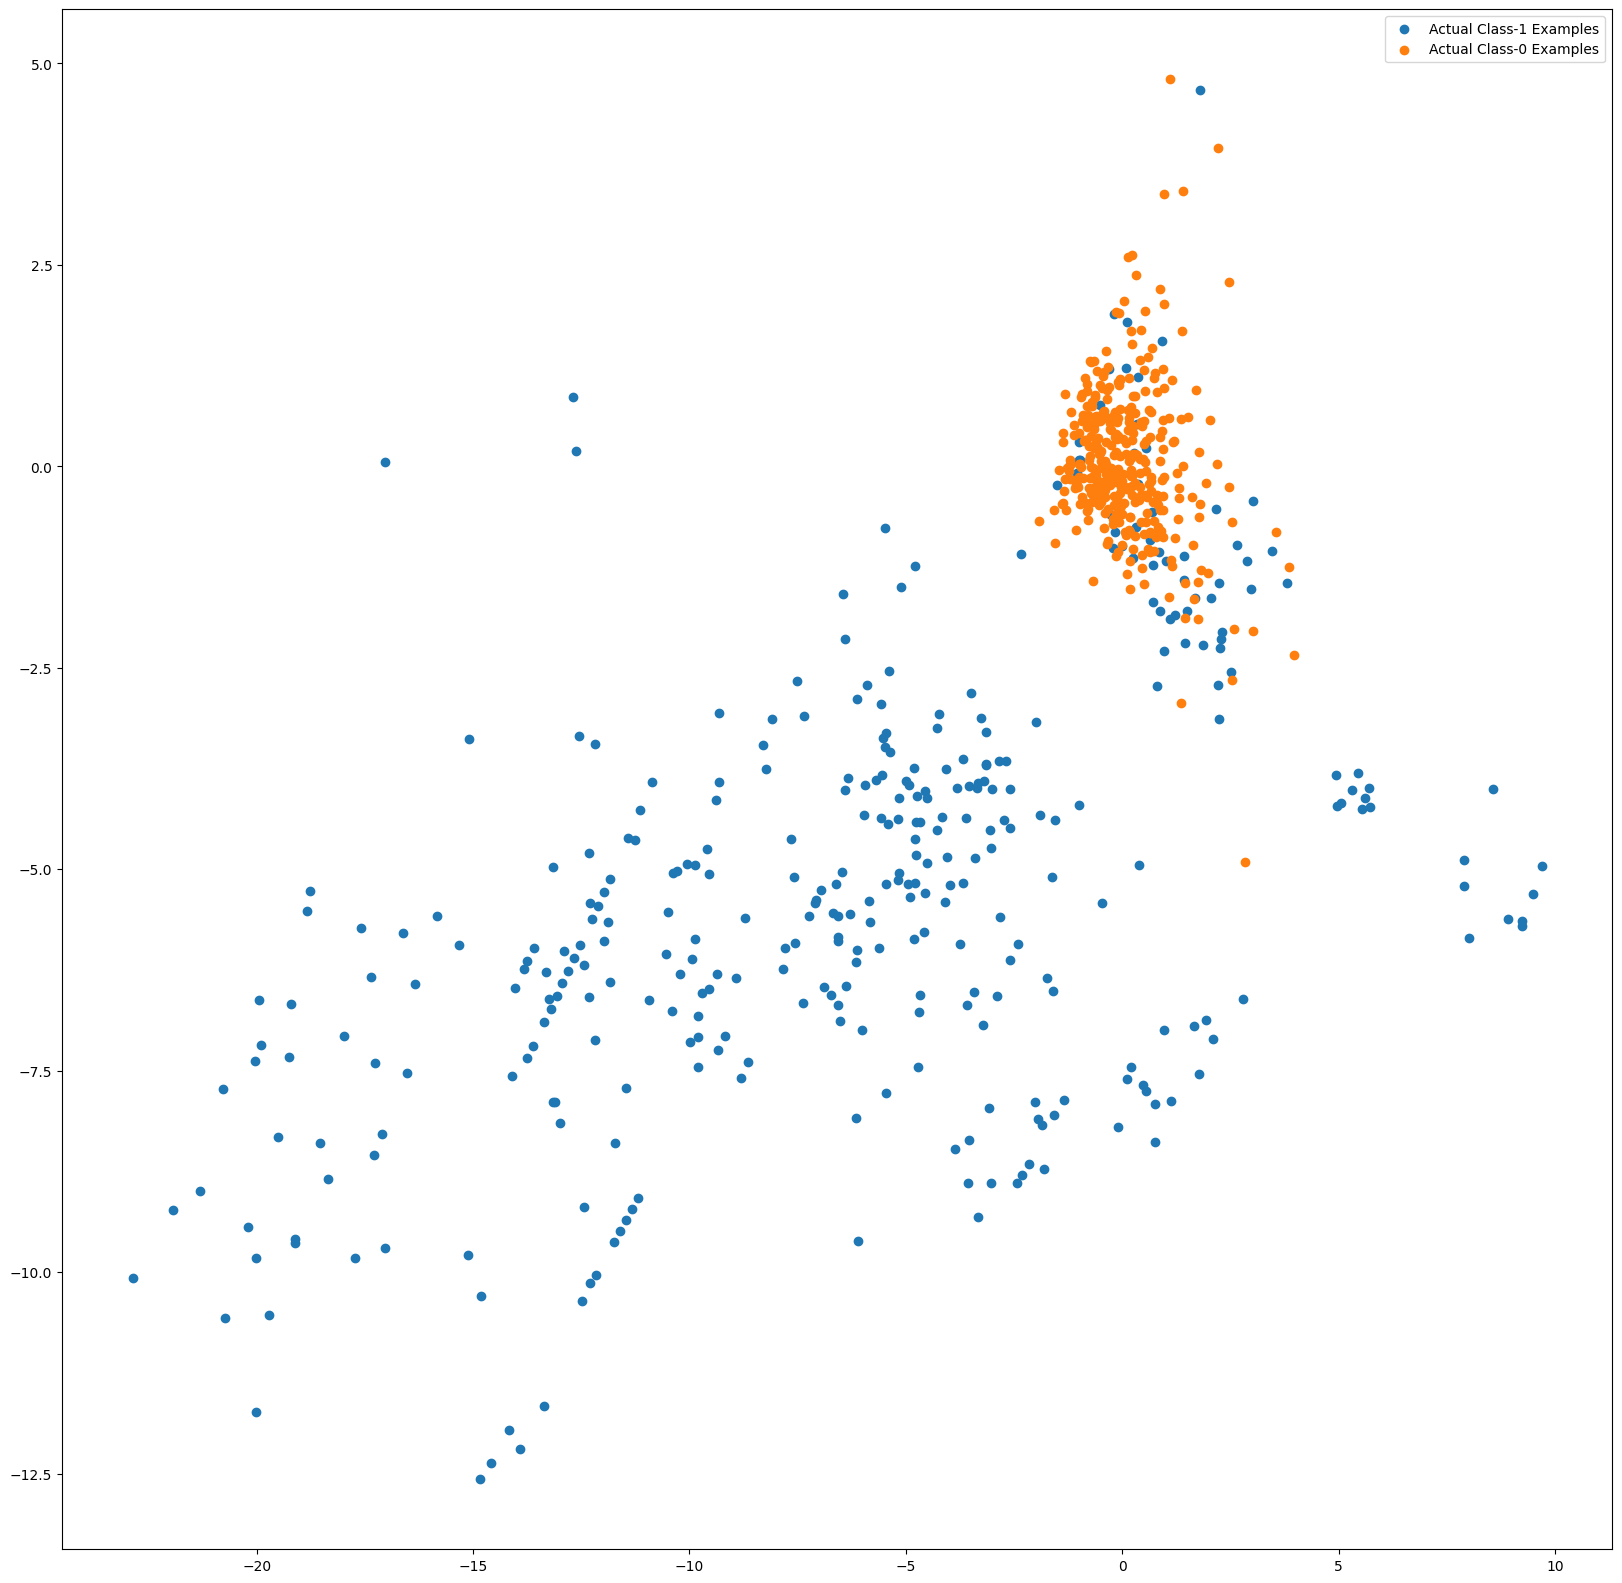

In [ ]:
#Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)

print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Print the FPR,TPR & select the best threshold from the roc curve for the best model


In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.85149777


We can see that the threshold is 0.85, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.



## Handling Imbalance of Data

As we see that the data is heavily imbalanced, we're going to try several approaches for handling data imbalance.


- **Oversampling**: Here we will make the same count of non-fraudulent transctions as fraudulent transctions.
- **SMOTE**: Synthetic minority oversampling technique. It is another oversampling technique, which uses the nearest neighbor algorithm to create synthetic data.
- **Adasyn**: This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

### Random Oversampling

In [ ]:
#Import Random Oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
#Instantiate the mddel
ros=RandomOverSampler()

#Resampling X and y
X_train_ros, y_train_ros=ros.fit_resample(X_train, y_train)

In [ ]:
#Befor sampling class distribution
print('Before sampling class distribution:', Counter(y_train))

#New class distribution
print('New class distribution:', Counter(y_train_ros))

Before sampling class distribution: Counter({0: 226620, 1: 360})
New class distribution: Counter({0: 226620, 1: 226620})


## Logistic Regression with ROS

In [ ]:
#Create KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

#Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#Specify score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

#Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#Results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.926713,0.312370,0.053825,0.025353,0.01,{'C': 0.01},0.987089,0.987203,0.987546,0.987444,...,0.987421,0.000259,6,0.987512,0.987445,0.987420,0.987474,0.987328,0.987436,0.000062
1,2.001684,0.264970,0.045263,0.008312,0.1,{'C': 0.1},0.987147,0.987281,0.987625,0.987477,...,0.987485,0.000263,5,0.987581,0.987506,0.987484,0.987538,0.987392,0.987500,0.000063
2,1.794997,0.095047,0.038973,0.000735,1,{'C': 1},0.987153,0.987287,0.987632,0.987479,...,0.987493,0.000265,4,0.987588,0.987511,0.987490,0.987544,0.987399,0.987507,0.000063
3,2.032116,0.333233,0.041065,0.003156,10,{'C': 10},0.987154,0.987288,0.987632,0.987479,...,0.987493,0.000265,3,0.987589,0.987511,0.987492,0.987545,0.987400,0.987507,0.000063
4,2.010283,0.274250,0.039984,0.002593,100,{'C': 100},0.987155,0.987288,0.987632,0.987480,...,0.987493,0.000265,1,0.987589,0.987511,0.987492,0.987544,0.987400,0.987507,0.000063
5,2.013489,0.292986,0.040953,0.003495,1000,{'C': 1000},0.987155,0.987288,0.987632,0.987479,...,0.987493,0.000265,2,0.987589,0.987511,0.987492,0.987544,0.987400,0.987507,0.000063


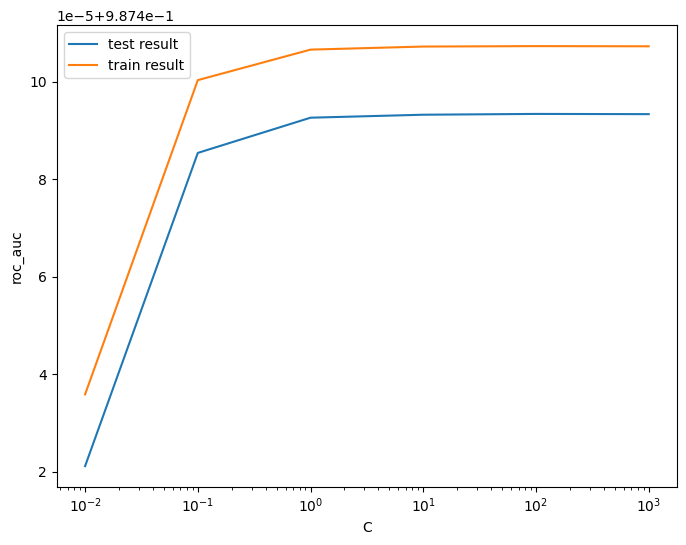

In [ ]:
#Plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
#Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print("The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

The highest test roc_auc is 0.9874934170027159 at C = 100


### Logistic Regression with optimal C


In [ ]:
#Instantiate the model with best C
logistic_ros = LogisticRegression(C=100)

In [ ]:
#Fit the model on the train set
logistic_ros_model = logistic_ros.fit(X_train_ros, y_train_ros)

### Prediction on the Train set

In [ ]:
#Predict on the train set
y_train_pred = logistic_ros_model.predict(X_train_ros)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[220233   6387]
 [ 18236 208384]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train_ros, y_train_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

#F1 score
print("F1-Score:", f1_score(y_train_ros, y_train_pred))

Accuracy: 0.9456733739299268
Recall: 0.9195304915717942
Specificity: 0.9718162562880593
F1-Score: 0.9442149930560433


In [ ]:
#Get classification report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95    226620
           1       0.97      0.92      0.94    226620

    accuracy                           0.95    453240
   macro avg       0.95      0.95      0.95    453240
weighted avg       0.95      0.95      0.95    453240



In [ ]:
#Predicted probability
y_train_pred_proba = logistic_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
#Get roc_auc score
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9875035642821571

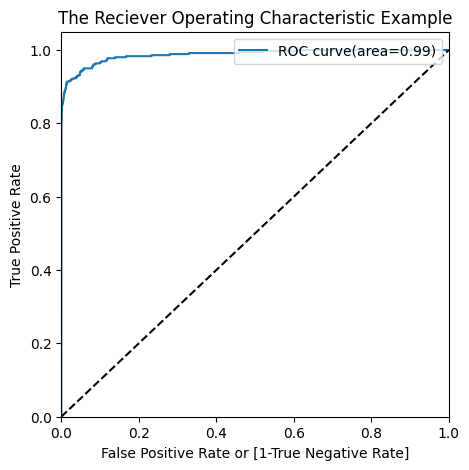

In [ ]:
#Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

### Prediction on the Test set

In [ ]:
#Prediction on the test set
y_test_pred = logistic_ros_model.predict(X_test)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54968  1665]
 [    8   105]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 0.9705177457441935
Recall: 0.9292035398230089
Specificity: 0.9706001801070048


In [ ]:
#Get classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56633
           1       0.06      0.93      0.11       113

    accuracy                           0.97     56746
   macro avg       0.53      0.95      0.55     56746
weighted avg       1.00      0.97      0.98     56746



In [ ]:
#Predicted probability
y_test_pred_proba = logistic_ros_model.predict_proba(X_test)[:,1]

In [ ]:
#Get roc_auc score
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.971449461358797

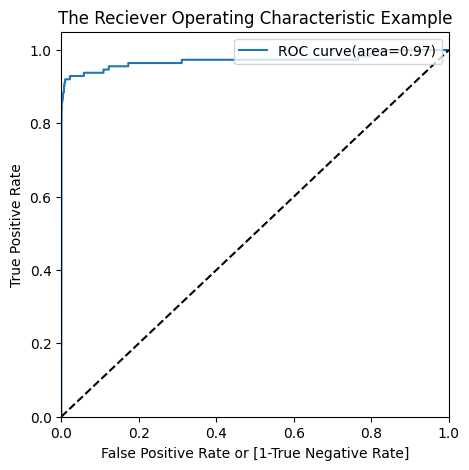

In [ ]:
#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Summary: Logistic Regression with ROS

**Train Set**

1. Accuracy: 0.9456733739299268
2. Recall: 0.9195304915717942
3. Specificity: 0.9718162562880593
4. F1-Score: 0.9442149930560433

**Test Set**

1. Accuracy: 0.9705177457441935
2. Recall: 0.9292035398230089
3. Specificity: 0.9706001801070048
4. ROC: 0.97

## XGBoost with ROS

In [ ]:
#Hyperparameter tuning with XGBoost

#Create a KFold object
folds = 3

#Specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


#Specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

#Set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

#Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#Get cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,33.930608,0.327824,0.177703,0.031998,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999896,0.999918,0.999849,0.999888,0.000029,6,0.999915,0.999910,0.999905,0.999910,4.248251e-06
1,43.859312,0.264158,0.138877,0.001105,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999905,0.999908,0.999859,0.999891,0.000022,4,0.999913,0.999905,0.999904,0.999908,4.119871e-06
2,47.424500,0.546210,0.141953,0.004964,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999890,0.999915,0.999859,0.999888,0.000023,5,0.999900,0.999905,0.999901,0.999902,1.860069e-06
3,31.973844,0.419782,0.153589,0.033725,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999983,0.999995,0.999976,0.999985,0.000008,2,0.999998,0.999996,0.999999,0.999998,1.400438e-06
4,41.572920,0.241688,0.125914,0.001086,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999983,0.999997,0.999976,0.999985,0.000009,1,1.000000,0.999999,0.999999,0.999999,4.197426e-07
5,45.656113,0.723454,0.149361,0.031761,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999979,0.999989,0.999973,0.999981,0.000007,3,0.999998,0.999995,0.999996,0.999997,9.658096e-07


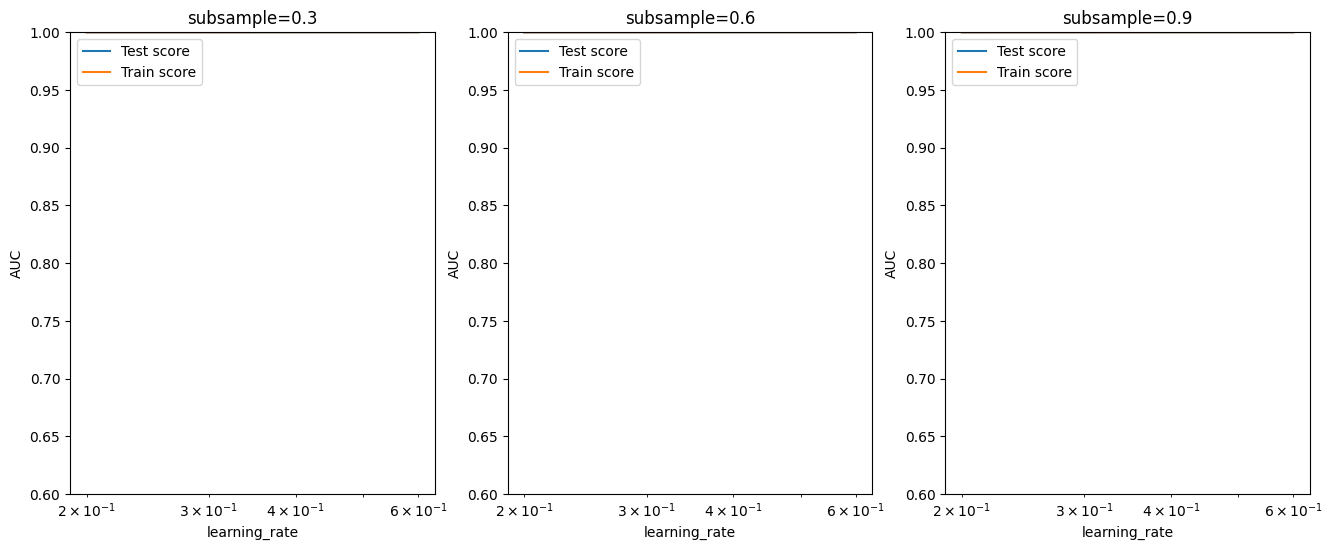

In [ ]:
#Plotting the curve
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['Test score', 'Train score'], loc='upper left')
    plt.xscale('log')

### Model with optimal hyperparameters

We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
#Get the best params
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [ ]:
#Chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

#Fit model on training data
xgb_ros_model = XGBClassifier(params = params)
xgb_ros_model.fit(X_train_ros, y_train_ros)

[08:08:00] WARNING: ../src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor=None, ...)

### Prediction on the Train set

In [ ]:
#Predictions on the train set
y_train_pred = xgb_ros_model.predict(X_train_ros)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[226620      0]
 [     0 226620]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train_ros, y_train_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 1.0
Recall: 1.0
Specificity: 1.0


In [ ]:
#Get classification report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       1.00      1.00      1.00    226620

    accuracy                           1.00    453240
   macro avg       1.00      1.00      1.00    453240
weighted avg       1.00      1.00      1.00    453240



In [ ]:
#Predicted probability
y_train_pred_proba = xgb_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
#Get roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

1.0

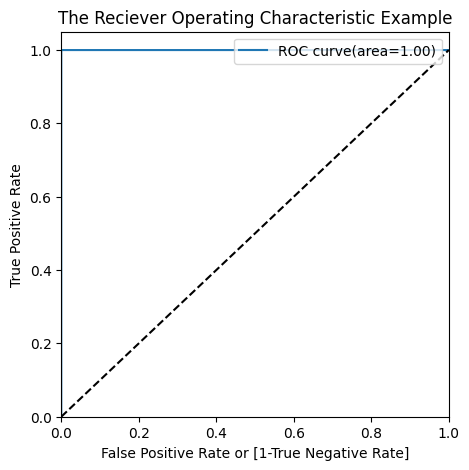

In [ ]:
#Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

### Prediction on the test set


In [ ]:
#Predictions on the test set
y_test_pred = xgb_ros_model.predict(X_test)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56626     7]
 [   16    97]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 0.9995946850879357
Recall: 0.8584070796460177
Specificity: 0.999876397153603


In [ ]:
#Get classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.93      0.86      0.89       113

    accuracy                           1.00     56746
   macro avg       0.97      0.93      0.95     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
#Predicted probability
y_test_pred_proba = xgb_ros_model.predict_proba(X_test)[:,1]

In [ ]:
#Get roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9740463712251324

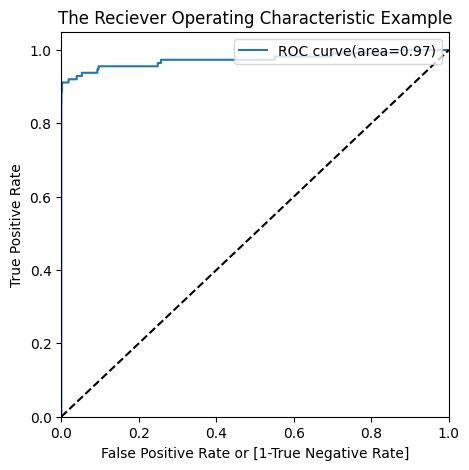

In [ ]:
#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Summary: XGBoost with ROS

**Train Set**

- Accuracy: 1.0
- Sensitivity: 1.0
- Specificity:1.0
- ROC-AUC: 1.0

**Test Set**

- Accuracy: 0.99
- Sensitivity: 0.85
- Specificity: 0.99
- ROC-AUC: 0.97

## Decision Tree with ROS

In [ ]:
#Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50)}


#Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

#Fit the grid search to the data
grid_search.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
#Get cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.085676,0.016593,0.040237,0.000524,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.985851,0.986018,0.985236,0.985702,0.000336,5
1,4.119754,0.041651,0.039649,0.000411,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.985851,0.986018,0.985236,0.985702,0.000336,5
2,4.117945,0.044413,0.040136,0.000398,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.985851,0.986018,0.985236,0.985702,0.000336,5
3,4.108155,0.039001,0.038933,0.000168,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.985851,0.986018,0.985236,0.985702,0.000336,5
4,6.065239,0.071518,0.042953,0.001348,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999165,0.999188,0.999210,0.999188,0.000019,3
5,6.124163,0.021284,0.042278,0.000971,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999189,0.999186,0.999199,0.999191,0.000006,2
6,6.057827,0.076866,0.041082,0.000376,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999208,0.999146,0.999278,0.999211,0.000054,1
7,6.072701,0.047718,0.041689,0.000593,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999190,0.999112,0.999255,0.999186,0.000058,4


In [ ]:
#Print the optimal sensitivity score and hyperparameters
print("The best roc_auc:", grid_search.best_score_)
print(grid_search.best_estimator_)

The best roc_auc: 0.9992107905655109
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [ ]:
#Model with optimal hyperparameters
dt_ros_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

### Prediction on the Train set


In [ ]:
#Predictions on the train set
y_train_pred = dt_ros_model.predict(X_train_ros)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[223800   2820]
 [   636 225984]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train_ros, y_train_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 0.992374900714853
Recall: 0.997193539846439
Specificity: 0.9875562615832671


In [ ]:
#Get classification report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    226620
           1       0.99      1.00      0.99    226620

    accuracy                           0.99    453240
   macro avg       0.99      0.99      0.99    453240
weighted avg       0.99      0.99      0.99    453240



In [ ]:
#Predicted probability
y_train_pred_proba = dt_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
#Get roc_auc score
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9992594953339651

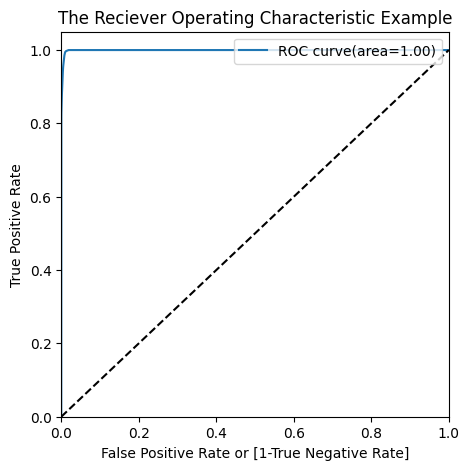

In [ ]:
#Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

### Prediction on the Test set

In [ ]:
#Predictions on the test set
y_test_pred = dt_ros_model.predict(X_test)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55941   692]
 [   17    96]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

# Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 0.9875057272759313
Recall: 0.8495575221238938
Specificity: 0.9877809757561845


In [ ]:
#Get classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56633
           1       0.12      0.85      0.21       113

    accuracy                           0.99     56746
   macro avg       0.56      0.92      0.60     56746
weighted avg       1.00      0.99      0.99     56746



In [ ]:
#Predicted probability
y_test_pred_proba = dt_ros_model.predict_proba(X_test)[:,1]

In [ ]:
#Get roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9230060524766744

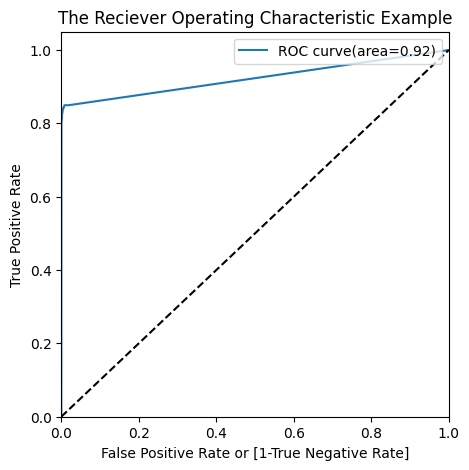

In [ ]:
#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## SMOTE (Synthetic Minority Oversampling Technique)
We create synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [ ]:
#Import SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
#Instantiate SMOTE
sm = SMOTE(random_state=27)

#Fit SMOTE to the train set
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)

In [ ]:
#Values before and after SMOTE
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smt.shape)

Before SMOTE oversampling X_train shape= (226980, 29)
After SMOTE oversampling X_train shape= (453240, 29)


## Logistic Regression with SMOTE


In [ ]:
#Create KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

#Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#Specify score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

#Fit the model
model_cv.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#Get results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.711951,0.232352,0.048832,0.012407,0.01,{'C': 0.01},0.989452,0.989445,0.988803,0.989158,...,0.989248,0.000247,6,0.989234,0.989239,0.989318,0.989327,0.989185,0.989261,0.000054
1,1.528001,0.043859,0.039225,0.001115,0.1,{'C': 0.1},0.989537,0.989523,0.988890,0.989242,...,0.989329,0.000244,5,0.989317,0.989315,0.989400,0.989408,0.989271,0.989342,0.000053
2,1.756989,0.303327,0.042433,0.004154,1,{'C': 1},0.989546,0.989530,0.988898,0.989251,...,0.989337,0.000244,4,0.989325,0.989322,0.989409,0.989416,0.989279,0.989350,0.000053
3,1.792312,0.231202,0.040585,0.003485,10,{'C': 10},0.989547,0.989530,0.988899,0.989251,...,0.989338,0.000244,3,0.989326,0.989323,0.989409,0.989417,0.989280,0.989351,0.000053
4,1.530763,0.085251,0.038892,0.000603,100,{'C': 100},0.989547,0.989530,0.988899,0.989251,...,0.989338,0.000244,2,0.989326,0.989323,0.989409,0.989417,0.989280,0.989351,0.000053
5,1.755636,0.383585,0.043104,0.007349,1000,{'C': 1000},0.989547,0.989530,0.988899,0.989251,...,0.989338,0.000244,1,0.989326,0.989323,0.989409,0.989417,0.989280,0.989351,0.000053


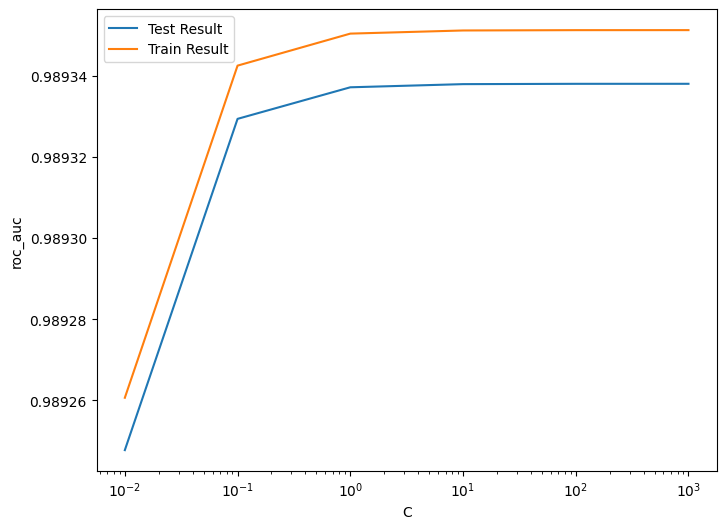

In [ ]:
#Plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['Test Result', 'Train Result'], loc='upper left')
plt.xscale('log')

In [ ]:
#Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print("The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

The highest test roc_auc is 0.9893379935907044 at C = 1000


### Logistic Regression with the optimal C

In [ ]:
#Instantiate the model with best C
logistic_smote = LogisticRegression(C=1000)

In [ ]:
#Fit the model on the train set
logistic_smote_model = logistic_smote.fit(X_train_smt, y_train_smt)

### Prediction on the Train set


In [ ]:
#Predictions on the train set
y_train_pred = logistic_smote_model.predict(X_train_smt)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smt, y_train_pred)
print(confusion)

[[219686   6934]
 [ 17864 208756]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train_smt, y_train_pred))

#Sensitivity
print("Sensitivity:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 0.9452872650251523
Sensitivity: 0.9211720060012355
Specificity: 0.9694025240490689


In [ ]:
#Get classification_report
print(classification_report(y_train_smt, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95    226620
           1       0.97      0.92      0.94    226620

    accuracy                           0.95    453240
   macro avg       0.95      0.95      0.95    453240
weighted avg       0.95      0.95      0.95    453240



In [ ]:
#Predicted probability
y_train_pred_proba_log = logistic_smote_model.predict_proba(X_train_smt)[:,1]

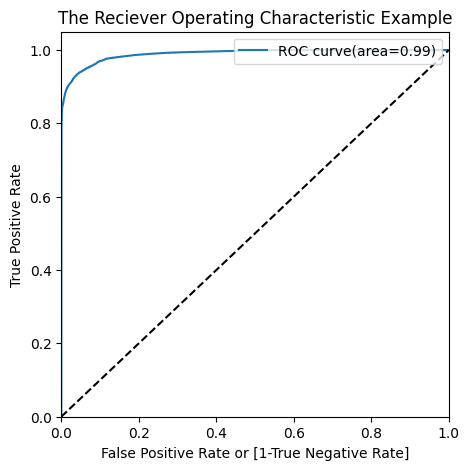

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smt, y_train_pred_proba_log)

### Prediction on the Test set


In [ ]:
#Prediction on the test set
y_test_pred = logistic_smote_model.predict(X_test)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54785  1848]
 [    8   105]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 0.9672928488351602
Recall: 0.9292035398230089
Specificity: 0.9673688485511981


In [ ]:
#Get classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56633
           1       0.05      0.93      0.10       113

    accuracy                           0.97     56746
   macro avg       0.53      0.95      0.54     56746
weighted avg       1.00      0.97      0.98     56746



In [ ]:
#Predicted probability
y_test_pred_proba = logistic_smote_model.predict_proba(X_test)[:,1]

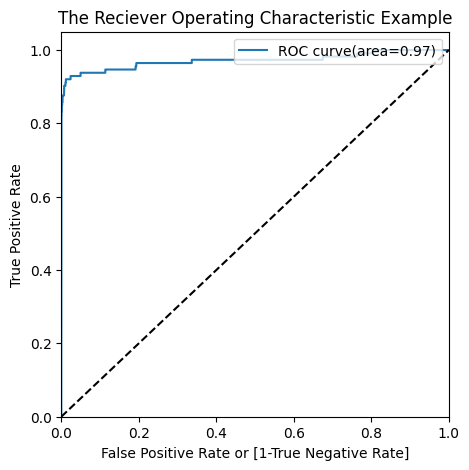

In [ ]:
#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Summary: Logistic Regression with SMOTE

**Train Set**

- Accuracy: 0.95
- Recall: 0.92
- Specificity: 0.96
- ROC: 0.99

**Test Set**

- Accuracy: 0.97
- Recall: 0.93
- Specificity: 0.97
- ROC: 0.97

## XGBoost with SMOTE


In [ ]:
#Hyperparameter tuning with XGBoost

#Create a KFold object
folds = 3

#Specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


#Specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

#Set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

#Fit the model
model_cv.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#Get cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,36.232334,0.494138,0.126456,0.002817,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999626,0.999611,0.999531,0.999589,0.000042,4,0.999649,0.999625,0.999603,0.999626,1.902965e-05
1,52.375396,0.053076,0.123855,0.001219,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999588,0.999606,0.999531,0.999575,0.000032,5,0.999614,0.999624,0.999614,0.999617,4.672389e-06
2,62.873959,0.566324,0.129294,0.006618,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999576,0.999561,0.999515,0.999551,0.000026,6,0.999605,0.999594,0.999607,0.999602,5.706721e-06
3,35.648649,0.769539,0.121504,0.001385,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999946,0.999945,0.999929,0.999940,0.000008,2,0.999973,0.999963,0.999973,0.999970,4.652502e-06
4,51.370135,0.749507,0.161781,0.025945,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999949,0.999965,0.999926,0.999947,0.000016,1,0.999979,0.999973,0.999972,0.999975,3.162250e-06
5,62.120228,0.605015,0.118492,0.001759,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999937,0.999945,0.999919,0.999934,0.000011,3,0.999972,0.999970,0.999970,0.999971,6.170675e-07


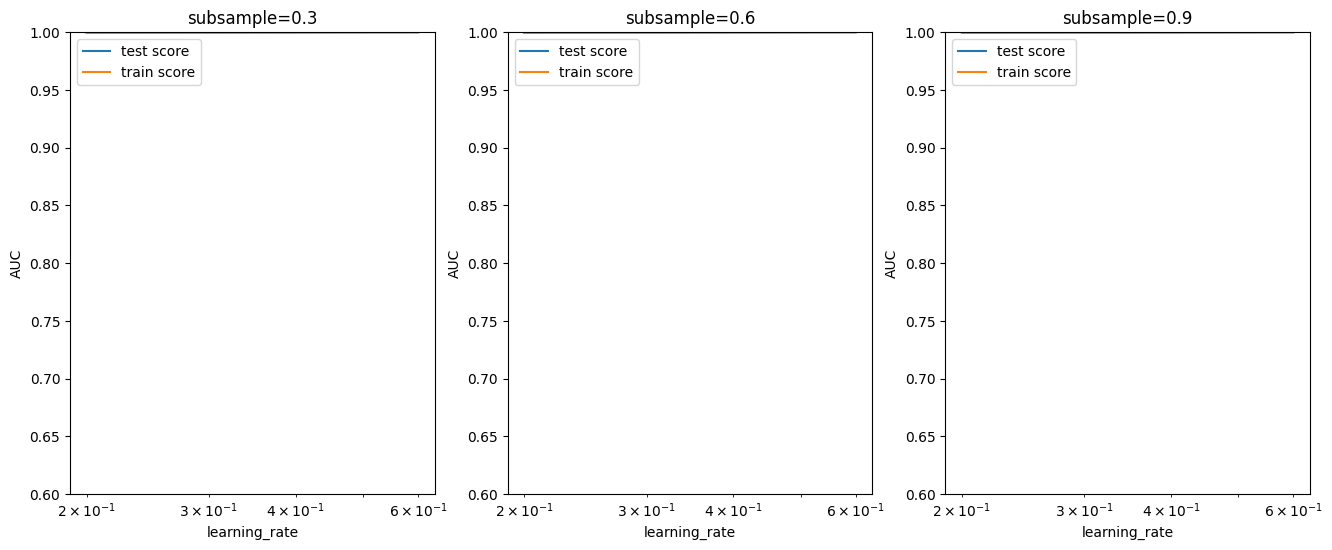

In [ ]:
#Plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Model with optimal hyperparameters

We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.6 and subsample: 0.6

In [ ]:
#Print best params
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [ ]:
#Chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

#Fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smt, y_train_smt)

[08:47:28] WARNING: ../src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor=None, ...)

Prediction on the Train set


In [ ]:
#Predictions on the train set
y_train_pred = xgb_smote_model.predict(X_train_smt)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_smt, y_train_pred)
print(confusion)

[[226620      0]
 [     0 226620]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train_smt, y_train_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 1.0
Recall: 1.0
Specificity: 1.0


In [ ]:
#Get classification report
print(classification_report(y_train_smt, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       1.00      1.00      1.00    226620

    accuracy                           1.00    453240
   macro avg       1.00      1.00      1.00    453240
weighted avg       1.00      1.00      1.00    453240



In [ ]:
#Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smt)[:,1]

In [ ]:
#Get roc_auc score
auc = metrics.roc_auc_score(y_train_smt, y_train_pred_proba)
auc

1.0

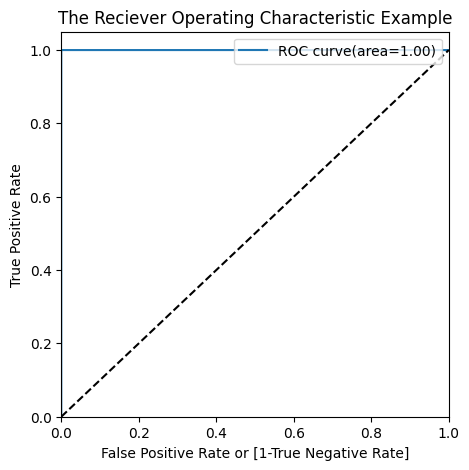

In [ ]:
#Plot the ROC curve
draw_roc(y_train_smt, y_train_pred_proba)

Prediction on the Test set


In [ ]:
#Predictions on the test set
y_test_pred = xgb_smote_model.predict(X_test)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56605    28]
 [   13   100]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 0.9992774821132767
Recall: 0.8849557522123894
Specificity: 0.9995055886144121


In [ ]:
#Get classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.78      0.88      0.83       113

    accuracy                           1.00     56746
   macro avg       0.89      0.94      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
#Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]

In [ ]:
#Get roc_auc score
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9778205552314865

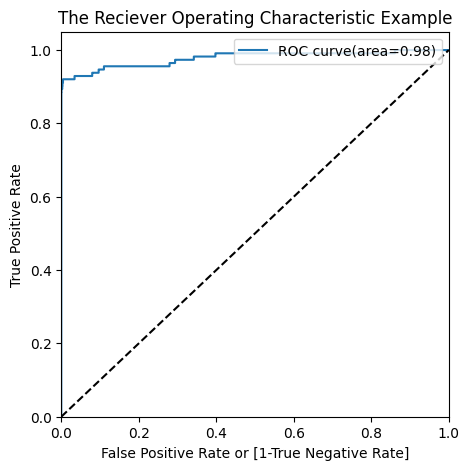

In [ ]:
#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Summary: XGBoost with SMOTE

**Train Set**

- Accuracy: 0.99
- Recall: 1.0
- Specificity: 0.99
- ROC-AUC: 1.0

**Test Set**

- Accuracy: 0.99
- Recall: 0.88
- Specificity: 0.99
- ROC-AUC: 0.98

Overall, the model is performing well in the test set, what it had learnt from the train set.

## Decision Tree with SMOTE


In [ ]:
#Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50)}


#Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

#Fit the grid search to the data
grid_search.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
#Print cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.680802,0.042494,0.042047,0.002380,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.983514,0.983641,0.983014,0.983390,0.000271,5
1,6.662812,0.037882,0.040408,0.001058,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.983514,0.983641,0.983013,0.983389,0.000271,6
2,6.683447,0.042551,0.040965,0.000380,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.983454,0.983667,0.982965,0.983362,0.000294,8
3,6.704814,0.006539,0.041051,0.001314,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.983454,0.983675,0.982965,0.983365,0.000297,7
4,12.479918,0.027396,0.045086,0.001920,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998070,0.997812,0.997774,0.997885,0.000131,1
5,12.431808,0.040856,0.044041,0.000389,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998071,0.997758,0.997817,0.997882,0.000136,2
6,12.353723,0.019492,0.043625,0.000671,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997971,0.997763,0.997739,0.997824,0.000104,3
7,12.372988,0.093447,0.044238,0.000337,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997932,0.997772,0.997724,0.997809,0.000089,4


In [ ]:
#Print the optimal sensitivity score and hyperparameters
print("The best roc_auc:", grid_search.best_score_)
print(grid_search.best_estimator_)

The best roc_auc: 0.9978850846552133
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [ ]:
#Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smt, y_train_smt)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

Prediction on the Train set


In [ ]:
#Predictions on the train set
y_train_pred = dt_smote_model.predict(X_train_smt)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_smt, y_train_pred)
print(confusion)

[[223537   3083]
 [  2017 224603]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train_smt, y_train_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 0.9887476833465714
Recall: 0.9910996381607978
Specificity: 0.9863957285323449


In [ ]:
#Get classification report
print(classification_report(y_train_smt, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    226620
           1       0.99      0.99      0.99    226620

    accuracy                           0.99    453240
   macro avg       0.99      0.99      0.99    453240
weighted avg       0.99      0.99      0.99    453240



In [ ]:
#Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smt)[:,1]

In [ ]:
#Get roc_auc
auc = metrics.roc_auc_score(y_train_smt, y_train_pred_proba)
auc

0.9984060705029516

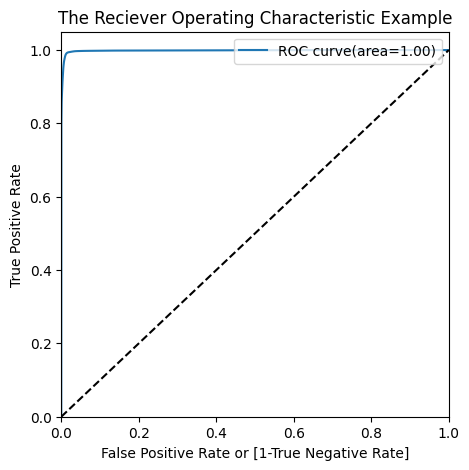

In [ ]:
#Plot the ROC curve
draw_roc(y_train_smt, y_train_pred_proba)

Prediction on the Test set


In [ ]:
#Predictions on the test set
y_test_pred = dt_smote_model.predict(X_test)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55848   785]
 [   14    99]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 0.9859197124026363
Recall: 0.8761061946902655
Specificity: 0.9861388236540533


In [ ]:
#Get classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56633
           1       0.11      0.88      0.20       113

    accuracy                           0.99     56746
   macro avg       0.56      0.93      0.60     56746
weighted avg       1.00      0.99      0.99     56746



In [ ]:
#Predicted probability
y_test_pred_proba = dt_smote_model.predict_proba(X_test)[:,1]

In [ ]:
#Get roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.925130271305904

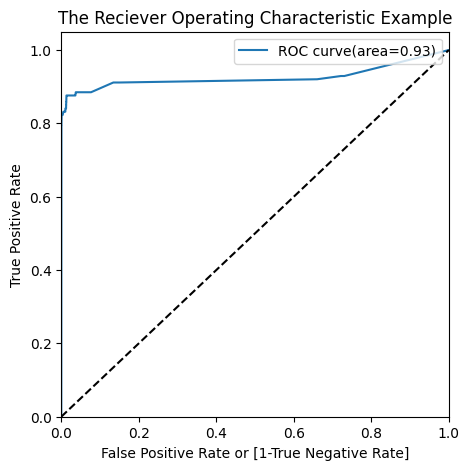

In [ ]:
#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Summary: Decision Tree with SMOTE

**Train Set**

- Accuracy: 0.98
- Sensitivity: 0.99
- Specificity: 0.98
- ROC-AUC: 1.00

**Test Set**

- Accuracy: 0.98
- Sensitivity: 0.87
- Specificity: 0.98
- ROC-AUC: 0.93

## AdaSyn (Adaptive Synthetic Sampling)


In [ ]:
#Import adasyn
from imblearn.over_sampling import ADASYN

In [ ]:
#Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

In [ ]:
#Befor sampling class distribution
print('Before sampling class distribution:', Counter(y_train))
#New class distribution
print('New class distribution:', Counter(y_train_ada))

Before sampling class distribution: Counter({0: 226620, 1: 360})
New class distribution: Counter({1: 226664, 0: 226620})


## Logistic Regression with AdaSyn


In [ ]:
#Creat KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

#Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#Specif score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

#Fit the model
model_cv.fit(X_train_ada, y_train_ada)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#Get results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.414097,0.107863,0.060769,0.001380,0.01,{'C': 0.01},0.965607,0.965828,0.965919,0.965785,0.000131,6,0.965911,0.965737,0.965778,0.965808,0.000074
1,1.384826,0.055984,0.062487,0.001787,0.1,{'C': 0.1},0.965827,0.966096,0.966155,0.966026,0.000143,5,0.966147,0.965965,0.966038,0.966050,0.000075
2,1.710498,0.215547,0.087670,0.036267,1,{'C': 1},0.965850,0.966126,0.966183,0.966053,0.000146,4,0.966174,0.965991,0.966068,0.966078,0.000075
3,1.426304,0.037732,0.062713,0.001786,10,{'C': 10},0.965852,0.966129,0.966186,0.966055,0.000146,3,0.966177,0.965993,0.966071,0.966080,0.000075
4,1.701880,0.172787,0.072500,0.015046,100,{'C': 100},0.965852,0.966129,0.966186,0.966056,0.000146,2,0.966177,0.965993,0.966071,0.966081,0.000075
5,1.442658,0.091385,0.061931,0.001443,1000,{'C': 1000},0.965852,0.966129,0.966186,0.966056,0.000146,1,0.966177,0.965993,0.966071,0.966081,0.000075


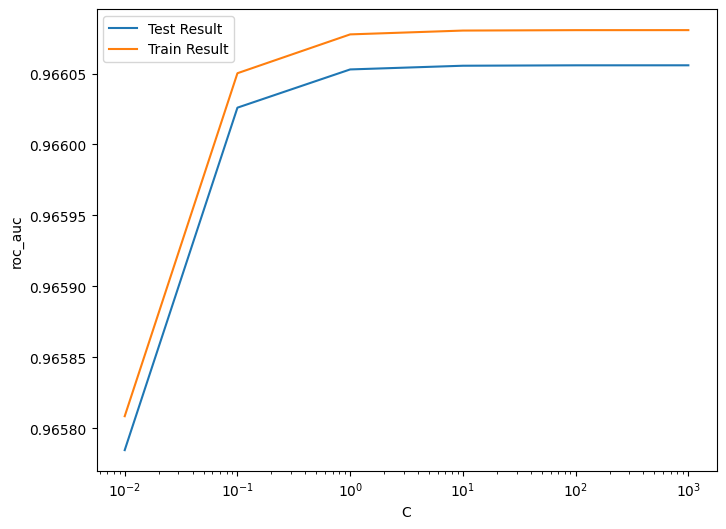

In [ ]:
#Plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['Test Result', 'Train Result'], loc='upper left')
plt.xscale('log')

In [ ]:
#Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print("The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

The highest test roc_auc is 0.9660557794987178 at C = 1000


Logistic regression with optimal C


In [ ]:
#Instantiate the model with best C
logistic_adasyn = LogisticRegression(C=1000)

In [ ]:
#Fit the model on the train set
logistic_ada_model = logistic_adasyn.fit(X_train_ada, y_train_ada)

Prediction on the Train set


In [ ]:
#Predictions on the train set
y_train_pred = logistic_ada_model.predict(X_train_ada)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_ada, y_train_pred)
print(confusion)

[[205065  21555]
 [ 25614 201050]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train_ada, y_train_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

#F1 score
print("F1-Score:", f1_score(y_train_ada, y_train_pred))

Accuracy: 0.8959394110535558
Recall: 0.8869957293615219
Specificity: 0.9048848292295473
F1-Score: 0.8950094486821927


In [ ]:
#Get classification_report
print(classification_report(y_train_ada, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90    226620
           1       0.90      0.89      0.90    226664

    accuracy                           0.90    453284
   macro avg       0.90      0.90      0.90    453284
weighted avg       0.90      0.90      0.90    453284



In [ ]:
#Predicted probability
y_train_pred_proba = logistic_ada_model.predict_proba(X_train_ada)[:,1]

In [ ]:
#Get roc_auc score
auc = metrics.roc_auc_score(y_train_ada, y_train_pred_proba)
auc

0.966079082720321

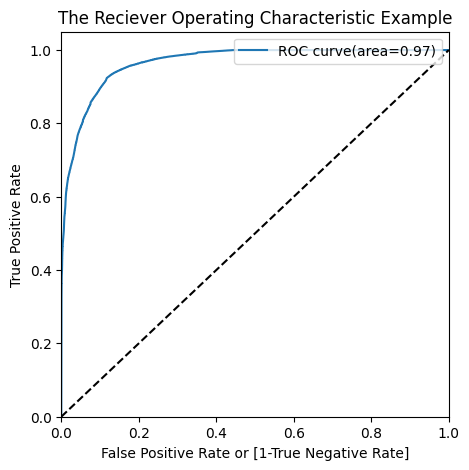

In [ ]:
#Plot the ROC curve
draw_roc(y_train_ada, y_train_pred_proba)

Prediction on the Test set


In [ ]:
#Prediction on the test set
y_test_pred = logistic_ada_model.predict(X_test)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[51130  5503]
 [    7   106]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

#F1 score
print("F1 score:", f1_score(y_test, y_test_pred))

Accuracy: 0.9029006449793818
Recall: 0.9380530973451328
Specificity: 0.9028305051824908
F1 score: 0.03704998252359315


In [ ]:
#Get classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56633
           1       0.02      0.94      0.04       113

    accuracy                           0.90     56746
   macro avg       0.51      0.92      0.49     56746
weighted avg       1.00      0.90      0.95     56746



In [ ]:
#Predicted probability
y_test_pred_proba = logistic_ada_model.predict_proba(X_test)[:,1]

In [ ]:
#Get roc_auc score
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9708185555530726

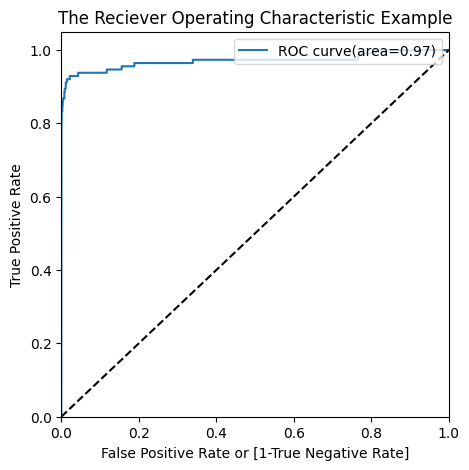

In [ ]:
#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Summary: Logistic Regression with AdaSyn

**Train Set**

- Accuracy: 0.89
- Sensitivity: 0.88
- Specificity: 0.90
- ROC: 0.96

**Test Set**

- Accuracy: 0.90
- Sensitivity: 0.93
- Specificity: 0.90
- ROC: 0.97

## Decision Tree with AdaSyn


In [ ]:
#Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50)}


#Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

#Fit the grid search to the data
grid_search.fit(X_train_ada,y_train_ada)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
#Get cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.713453,0.074042,0.040554,0.000950,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.892235,0.889385,0.885780,0.889133,0.002641,8
1,6.706353,0.088080,0.041520,0.001555,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.892243,0.889616,0.885780,0.889213,0.002654,5
2,6.705044,0.042752,0.043230,0.005275,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.892135,0.889692,0.885780,0.889202,0.002617,6
3,6.735182,0.060104,0.040877,0.000654,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.892140,0.889629,0.885780,0.889183,0.002615,7
4,12.421677,0.024753,0.042724,0.000604,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.897626,0.958843,0.908132,0.921534,0.026728,3
5,12.294824,0.084073,0.044812,0.003127,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.900357,0.954787,0.904451,0.919865,0.024750,4
6,12.181977,0.023355,0.042146,0.001100,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.909743,0.956678,0.916122,0.927514,0.020786,1
7,12.096019,0.100304,0.042020,0.000501,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.906719,0.953684,0.908065,0.922822,0.021829,2


In [ ]:
#Print the optimal sensitivity score and hyperparameters
print("The best roc_auc:", grid_search.best_score_)
print(grid_search.best_estimator_)

The best roc_auc: 0.9275142431502128
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [ ]:
#Model with optimal hyperparameters
dt_ada_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_ada_model.fit(X_train_ada, y_train_ada)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

Prediction on the Train set


In [ ]:
#Predictions on the train set
y_train_pred = dt_ada_model.predict(X_train_ada)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_ada, y_train_pred)
print(confusion)

[[217063   9557]
 [  3249 223415]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train_ada, y_train_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 0.9717483961489927
Recall: 0.9856660078353863
Specificity: 0.9578280822522284


In [ ]:
#Get classification report
print(classification_report(y_train_ada, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    226620
           1       0.96      0.99      0.97    226664

    accuracy                           0.97    453284
   macro avg       0.97      0.97      0.97    453284
weighted avg       0.97      0.97      0.97    453284



In [ ]:
#Predicted probability
y_train_pred_proba = dt_ada_model.predict_proba(X_train_ada)[:,1]

In [ ]:
#Get roc_auc
auc = metrics.roc_auc_score(y_train_ada, y_train_pred_proba)
auc

0.9902968173206373

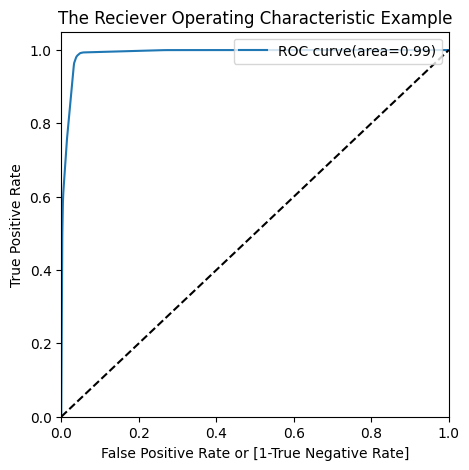

In [ ]:
#Get Plot the ROC curve
draw_roc(y_train_ada, y_train_pred_proba)

Prediction on the Test set


In [ ]:
#Predictions on the test set
y_test_pred = dt_ada_model.predict(X_test)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54187  2446]
 [    8   105]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 0.9567546611214888
Recall: 0.9292035398230089
Specificity: 0.9568096339589992


In [ ]:
#Get classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56633
           1       0.04      0.93      0.08       113

    accuracy                           0.96     56746
   macro avg       0.52      0.94      0.53     56746
weighted avg       1.00      0.96      0.98     56746



In [ ]:
#Predicted probability
y_test_pred_proba = dt_ada_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9447836707982729

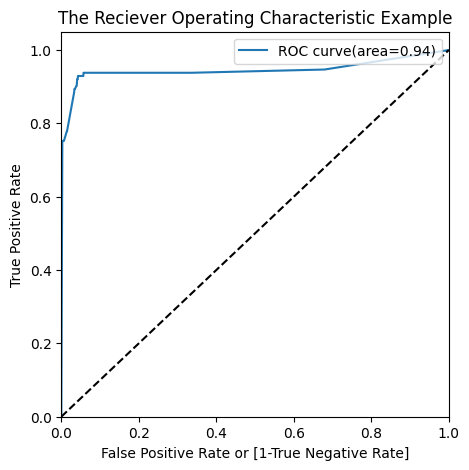

In [ ]:
#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Summary: Decision Tree with AdaSyn

**Train Set**

- Accuracy: 0.97
- Sensitivity: 0.98
- Specificity: 0.95
- ROC-AUC: 0.99

**Test Set**

- Accuracy: 0.95
- Sensitivity: 0.92
- Specificity: 0.95
- ROC-AUC: 0.94

## XGBoost with AdaSyn

In [ ]:
#Hyperparameter tuning with XGBoost

#Create a KFold object
folds = 3

#Specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


#Specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

#Set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

#Fit the model
model_cv.fit(X_train_ada, y_train_ada)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#Get cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,41.402160,6.562209,0.124035,0.004785,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.980158,0.987696,0.994344,0.987399,0.005795,2,0.999239,0.999145,0.999004,0.999129,0.000097
1,52.830126,0.135905,0.161926,0.030514,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978339,0.986549,0.994113,0.986334,0.006441,5,0.999104,0.999218,0.998932,0.999085,0.000118
2,63.840226,0.742323,0.119910,0.001244,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.977722,0.988959,0.994755,0.987145,0.007071,4,0.999224,0.999220,0.998949,0.999131,0.000129
3,36.483110,0.617941,0.144786,0.028517,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.987344,0.981745,0.997406,0.988832,0.006479,1,0.999943,0.999927,0.999923,0.999931,0.000009
4,53.124015,0.119879,0.121935,0.003287,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.980172,0.983611,0.997756,0.987180,0.007609,3,0.999946,0.999929,0.999930,0.999935,0.000008
5,63.636539,0.790781,0.119331,0.001182,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.979746,0.976743,0.997721,0.984737,0.009263,6,0.999956,0.999937,0.999951,0.999948,0.000008


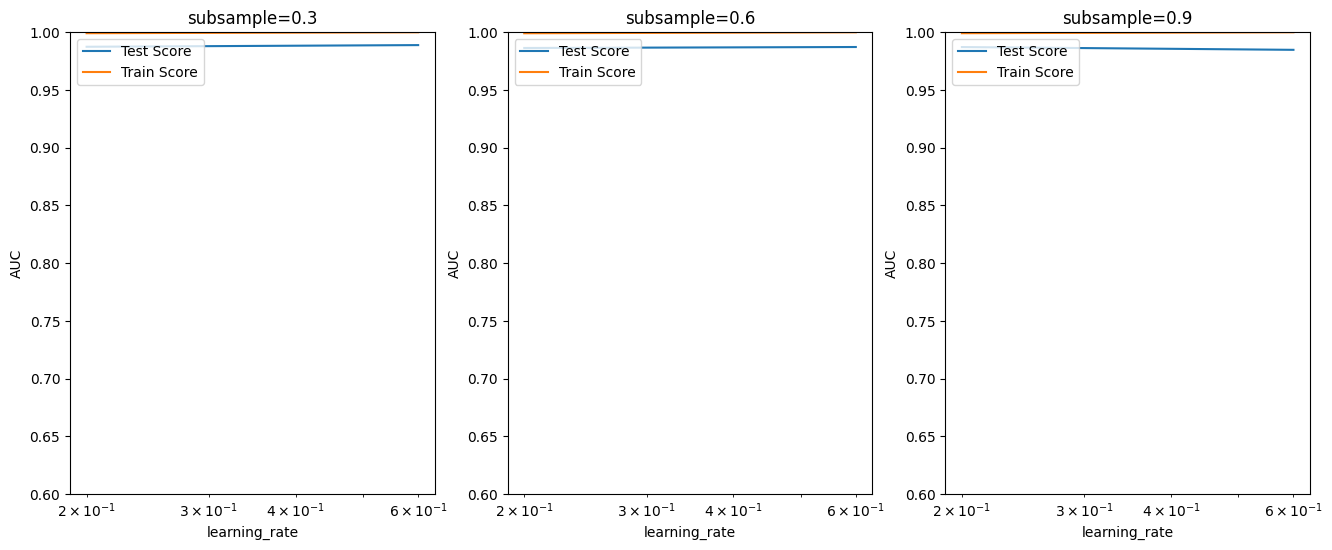

In [ ]:
#Plotting the curve
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['Test Score', 'Train Score'], loc='upper left')
    plt.xscale('log')

In [ ]:
#Get the best params
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [ ]:
#Chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

#Fit model on training data
xgb_ada_model = XGBClassifier(params = params)
xgb_ada_model.fit(X_train_ada, y_train_ada)

[09:35:12] WARNING: ../src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              predictor=None, ...)

Prediction on the Train set


In [ ]:
#Predictions on the train set
y_train_pred = xgb_ada_model.predict(X_train_ada)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_ada, y_train_ada)
print(confusion)

[[226620      0]
 [     0 226664]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train_ada, y_train_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 0.9999955877551381
Recall: 1.0
Specificity: 1.0


In [ ]:
#Get classification report
print(classification_report(y_train_ada, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       1.00      1.00      1.00    226664

    accuracy                           1.00    453284
   macro avg       1.00      1.00      1.00    453284
weighted avg       1.00      1.00      1.00    453284



In [ ]:
#Predicted probability
y_train_pred_proba = xgb_ada_model.predict_proba(X_train_ada)[:,1]

In [ ]:
#Get roc_auc
auc = metrics.roc_auc_score(y_train_ada, y_train_pred_proba)
auc

1.0

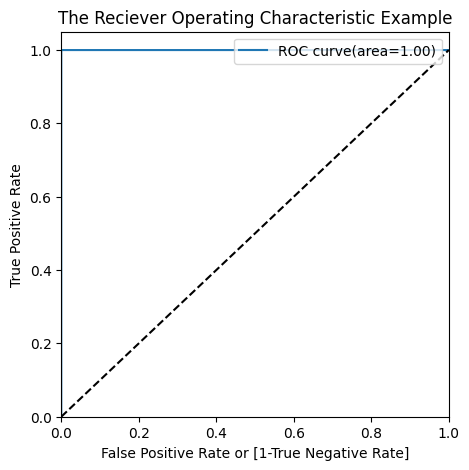

In [ ]:
#Plot the ROC curve
draw_roc(y_train_ada, y_train_pred_proba)

Prediction on the Test set


In [ ]:
#Predictions on the test set
y_test_pred = xgb_ada_model.predict(X_test)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56598    35]
 [   15    98]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

Accuracy: 0.9991188806259472
Recall: 0.8672566371681416
Specificity: 0.9993819857680151


In [ ]:
#Get classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.74      0.87      0.80       113

    accuracy                           1.00     56746
   macro avg       0.87      0.93      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
#Predicted probability
y_test_pred_proba = xgb_ada_model.predict_proba(X_test)[:,1]

In [ ]:
#Get roc score
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.976879392217771

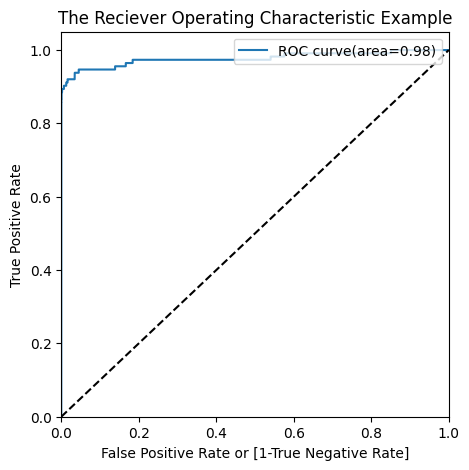

In [ ]:
#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Summary: XGBoost with AdaSyn

**Train Set**

- Accuracy: 0.99
- Sensitivity: 1.0
- Specificity: 1.0
- ROC-AUC = 1.0

**Test Set**

- Accuracy: 0.99
- Sensitivity: 0.86
- Specificity: 0.99
- ROC-AUC: 0.98

## Random Forest with AdaSyn

In [ ]:
#Hypertune the model
param_grid={
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300],
    'max_features': [10, 20]}

#Instantiate the model
rf=RandomForestClassifier()

#GridSearchCV
model_cv=GridSearchCV(
                      estimator=rf,
                      param_grid=param_grid,
                      n_jobs=-1,
                      verbose=1,
                      cv=2,
                      return_train_score=True)

#Fit the model
model_cv.fit(X_train_ada, y_train_ada)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [ ]:
#Get cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.713453,0.074042,0.040554,0.000950,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.892235,0.889385,0.885780,0.889133,0.002641,8
1,6.706353,0.088080,0.041520,0.001555,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.892243,0.889616,0.885780,0.889213,0.002654,5
2,6.705044,0.042752,0.043230,0.005275,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.892135,0.889692,0.885780,0.889202,0.002617,6
3,6.735182,0.060104,0.040877,0.000654,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.892140,0.889629,0.885780,0.889183,0.002615,7
4,12.421677,0.024753,0.042724,0.000604,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.897626,0.958843,0.908132,0.921534,0.026728,3
5,12.294824,0.084073,0.044812,0.003127,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.900357,0.954787,0.904451,0.919865,0.024750,4
6,12.181977,0.023355,0.042146,0.001100,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.909743,0.956678,0.916122,0.927514,0.020786,1
7,12.096019,0.100304,0.042020,0.000501,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.906719,0.953684,0.908065,0.922822,0.021829,2


In [ ]:
#Print the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9275142431502128 using {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [ ]:
#Model with the best hyperparameters

rfc_ada_model = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100,
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# Fit the model
rfc_ada_model.fit(X_train_ada, y_train_ada)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=50)

Prediction on the Train set


In [ ]:
#Predictions on the train set
y_train_pred = rfc_ada_model.predict(X_train_ada)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_ada, y_train_pred)
print(confusion)

[[223636   2984]
 [   689 225975]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_train_ada, y_train_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

#F1 score
print("F1-Score:", f1_score(y_train_ada, y_train_pred))

Accuracy: 0.9918969123110456
Recall: 0.9969602583559807
Specificity: 0.9868325831788898
F1-Score: 0.9919385105668502


In [ ]:
#Get classification report
print(classification_report(y_train_ada, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    226620
           1       0.99      1.00      0.99    226664

    accuracy                           0.99    453284
   macro avg       0.99      0.99      0.99    453284
weighted avg       0.99      0.99      0.99    453284



In [ ]:
#Predicted probability
y_train_pred_proba = rfc_ada_model.predict_proba(X_train_ada)[:,1]

In [ ]:
#Get roc_auc
auc = metrics.roc_auc_score(y_train_ada, y_train_pred_proba)
auc

0.9995666280156333

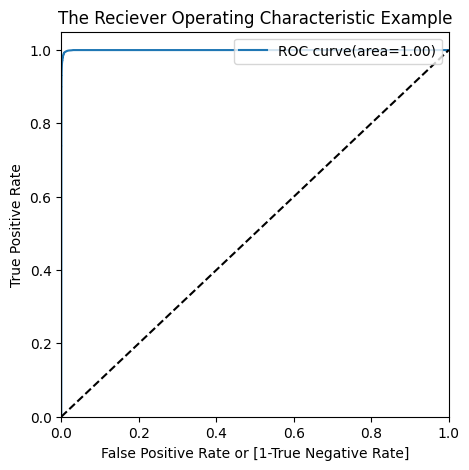

In [ ]:
#Plot the ROC curve
draw_roc(y_train_ada, y_train_pred_proba)

Prediction on the Test set


In [ ]:
#Predictions on the test set
y_test_pred = rfc_ada_model.predict(X_test)

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55807   826]
 [   12   101]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

#Sensitivity
print("Recall:", TP/float(TP+FN))

#Specificity
print("Specificity:", TN/float(TN+FP))

#F1 score
print("F1-Score:", f1_score(y_test, y_test_pred))

Accuracy: 0.9852324392908751
Recall: 0.8938053097345132
Specificity: 0.9854148641251567
F1-Score: 0.19423076923076926


In [ ]:
#Get classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56633
           1       0.11      0.89      0.19       113

    accuracy                           0.99     56746
   macro avg       0.55      0.94      0.59     56746
weighted avg       1.00      0.99      0.99     56746



In [ ]:
#Predicted probability
y_test_pred_proba = rfc_ada_model.predict_proba(X_test)[:,1]

In [ ]:
#Get roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9791731547743592

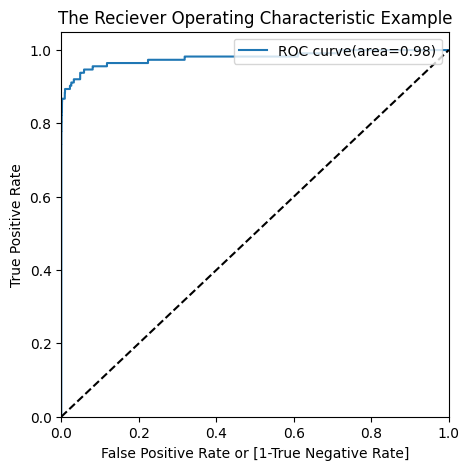

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Summary: Random Forest with AdaSyn

**Train Set**

1. Accuracy: 0.99
2. Recall: 0.99
3. Specificity: 0.98
4. ROC: 1.00

**Test Set**

1. Accuracy: 0.98
2. Recall: 0.89
3. Specificity: 0.98
4. ROC: 0.98

## Choosing best model on the balanced data

He we balanced the data with various approach such as Undersampling, Oversampling, SMOTE and AdaSyn. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model.

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE and AdaSyn models performed well. Among those models the simplist model Logistic Regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the mdoel is lesser than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the Logistic Regression model with SMOTE is the best model for its simlicity and less resource requirement.

### Print the FPR, TPR & select the best threshold from the roc curve for the best model


In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_smt, y_train_pred_proba_log))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smt, y_train_pred_proba_log)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9893472016435721
Threshold= 0.4245090273292578


We can see that the threshold is 0.42, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.



## Cost Benefit Analysis

We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high.

## Conclusion: Simple Algorithm. No Confusion.

We've chosen the simple algorithm for its high ROC on both Train and Test despite the low threshold.

It's easy to interpret for the bank fellows for effective decision-making. For complex algorithms make interpretation complex. Hence, lag in the decision-making.

For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic Regression model has good ROC score and also high Recall. Hence, we can go with the Logistic model here. It is also easier to interpret and explain to the business.